# Mall Customers Segmentation
* Sebastián Navarro (00321588)
* Data Mining (1442)

## Dataset
Enlace: https://www.kaggle.com/datasets/abdallahwagih/mall-customers-segmentation

El conjunto de datos de clientes del centro comercial proporciona información sobre 200 individuos que visitan un centro comercial, incluyendo información demográfica, ingresos anuales y hábitos de gasto. Se utilizará algoritmos de clustering para segmentar los clientes en grupos basados en sus características demográficas y de gasto. De esta manera, el centro comercial podrá personalizar sus estrategias de marketing y publicidad para cada grupo de clientes. Los algoritmos de clustering que se utilizarán son K-means, Agglomerative Clustering, Gaussian Mixture Model (GMM), DBSCAN y Affinity Propagation.

**Características del dataset**
* Filas: 200
* Columnas: 5
* CustomerID: ID único asignado al cliente.
* Género: El género del cliente.
* Edad: La edad del cliente.
* Ingreso Anual (k$): El ingreso anual del cliente en miles de dólares.
Puntuación de Gasto (1-100): La puntuación de gasto del cliente basada en su comportamiento y datos de compra.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Mall_Customers.csv'

df = pd.read_csv(file_path)
df.drop(columns="CustomerID",inplace=True,axis=1)
print(df.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


## Preprocesamiento

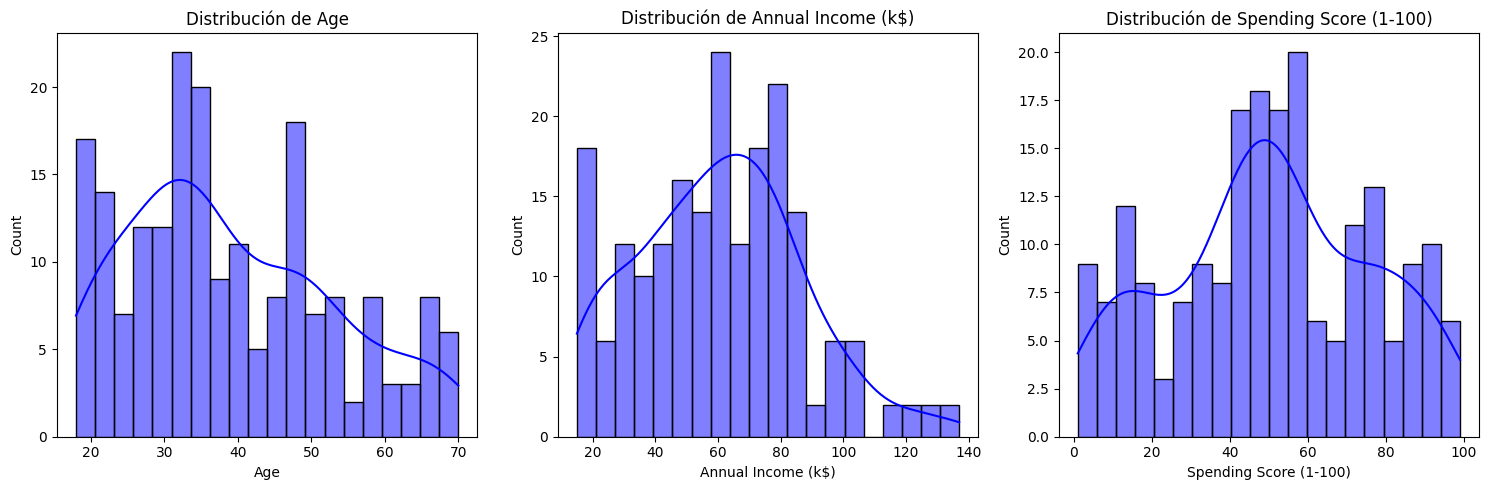

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de variables numéricas
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color="blue", bins=20)
    plt.title(f"Distribución de {col}")
plt.tight_layout()
plt.show()



* **Edad:** Se observa que la mayor concentración está entre los 30 y 40 años, con un pico significativo alrededor de los 35 años.
* **Ingreso Anual:** Destaca una alta concentración en el rango de 20-25k, con otros picos menores en los rangos de 80-100k y 100-120k.
* **Puntaje de Gasto (1-100):** Se observa una distribución bimodal, con picos en los rangos de 10-20 y 15-20, indicando que hay tanto clientes que gastan poco como clientes que gastan mucho.

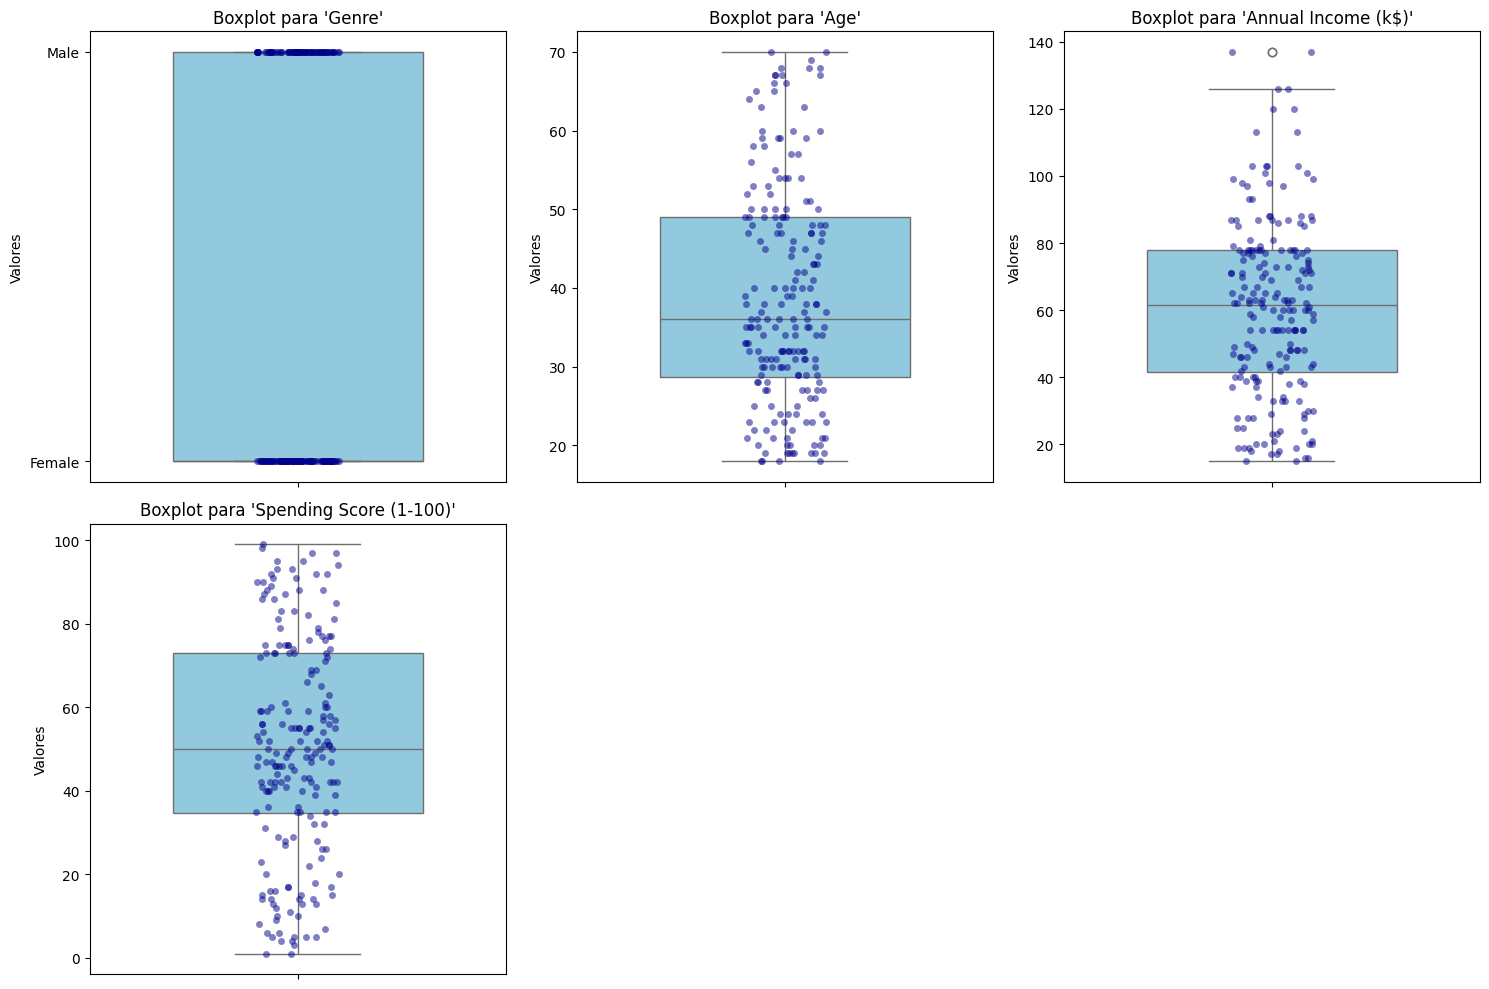

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar los subplots
num_cols = len(df.columns)
rows = (num_cols + 2) // 3  # Número de filas necesarias (3 gráficos por fila)
fig, axes = plt.subplots(rows, 3, figsize=(15, rows * 5))
axes = axes.flatten()

# Crear un boxplot y superponer puntos para cada columna
for i, column in enumerate(df.columns):
    sns.boxplot(y=df[column], ax=axes[i], color="skyblue", width=0.6)
    sns.stripplot(y=df[column], ax=axes[i], color="darkblue", alpha=0.5, jitter=True, size=5)
    axes[i].set_title(f"Boxplot para '{column}'", fontsize=12)
    axes[i].set_ylabel("Valores")
    axes[i].set_xlabel("")

# Eliminar gráficos en blanco si las columnas no son múltiplos de 3
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustar espacio entre subplots
plt.tight_layout()
plt.show()


* **Boxplot para 'Edad':** La mayoría de los clientes parecen estar en sus 40s y 50s, como se evidencia por el grupo denso de puntos en ese rango de edad. También hay algunos valores atípicos en edades más jóvenes y mayores.

* **Boxplot para 'Ingreso Anual (k$)':** La mayor parte de los ingresos se encuentran en el rango de 20-80k, con algunos valores atípicos de altos ingresos por encima de los 100k.

* **Boxplot para 'Puntaje de Gasto (1-100)':** Hay una amplia dispersión en el comportamiento de gasto, con algunos clientes que son muy altos gastadores y otros que son muy ahorradores.

Se decidió eliminar los primeros 2 valores atípicos en la variable 'Ingreso Anual (k$)' para mejorar la clusterización.

In [ ]:
# Obtener los 5 valores más altos de la columna 'Annual Income'
top_income = df.nlargest(5, 'Annual Income (k$)')

# Imprimir los resultados
print("Los valores más altos de Annual Income son:")
print(top_income)
print("Número de filas originales:", len(df))

# Eliminar filas donde 'Annual Income (k$)' sea igual a 137
df = df[df['Annual Income (k$)'] != 137]

# Verificar si las filas fueron eliminadas
print("Número de filas después de eliminar:", len(df))


Los valores más altos de Annual Income son:
      Genre  Age  Annual Income (k$)  Spending Score (1-100)
198    Male   32                 137                      18
199    Male   30                 137                      83
196  Female   45                 126                      28
197    Male   32                 126                      74
194  Female   47                 120                      16
Número de filas originales: 200
Número de filas después de eliminar: 198


## Distribución

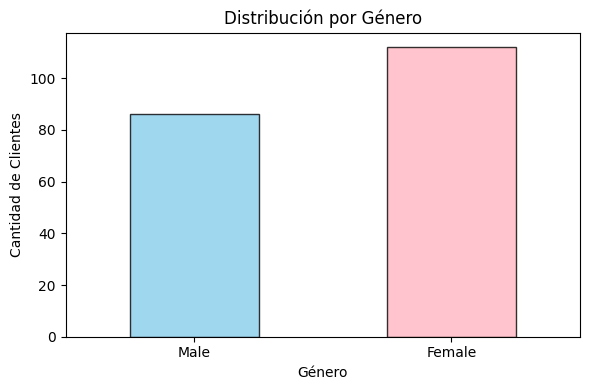

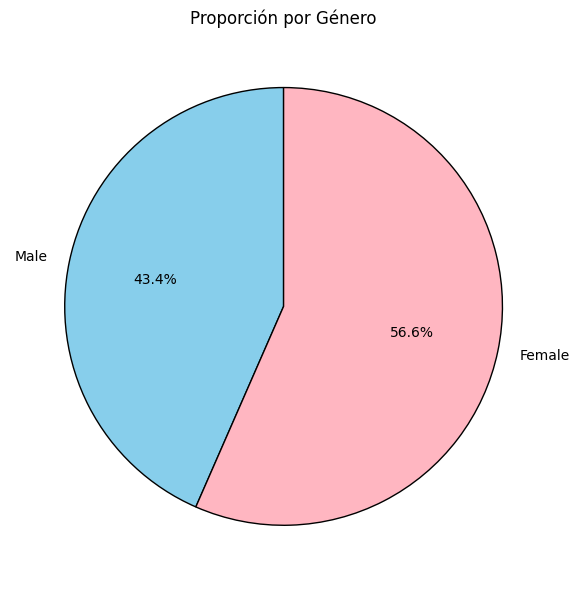

In [ ]:
import matplotlib.pyplot as plt

gender_counts = df['Genre'].value_counts()[['Male', 'Female']]

# Gráfico de barras
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', color=['skyblue', 'lightpink'], alpha=0.8, edgecolor='black')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Gráfico de pastel
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Proporción por Género')
plt.ylabel('')  # Quitar la etiqueta de eje Y
plt.tight_layout()
plt.show()

Podemos ver que la cantidad de clientes femeninos es significativamente mayor que la de clientes masculinos, estos datos indican que el centro comercial tiene una base de clientes predominantemente femenina. Se observa que el 56.6% de los clientes son mujeres, mientras que el 43.4% son hombres.

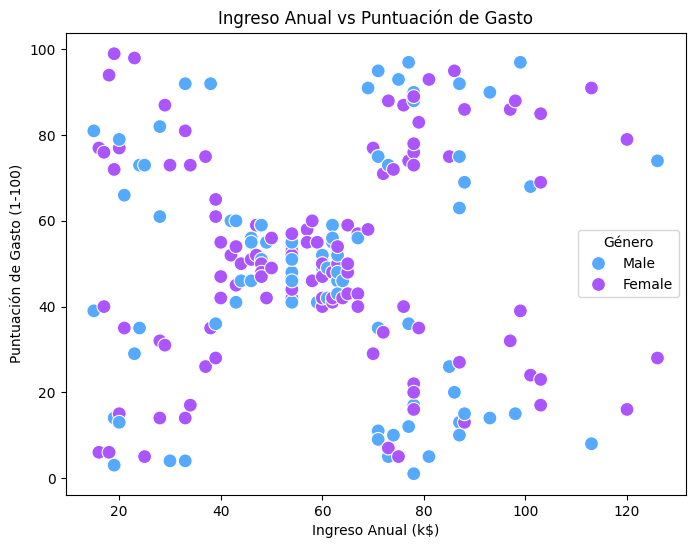

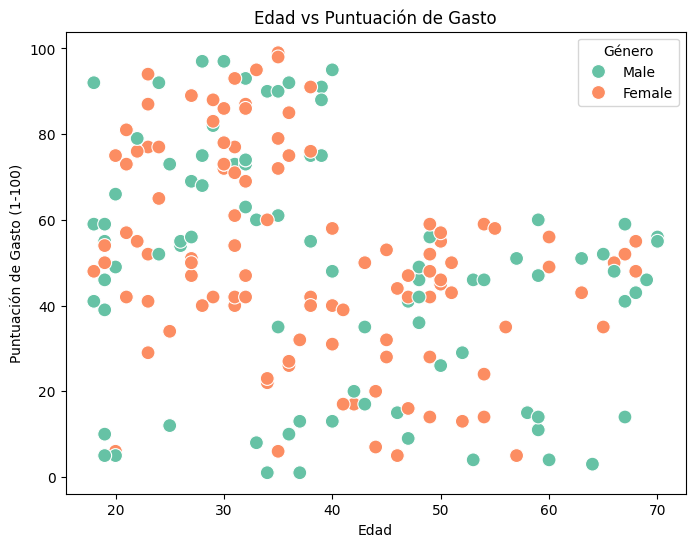

In [ ]:
# Scatterplot: Annual Income vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", hue="Genre", palette="cool", s=100)
plt.title("Ingreso Anual vs Puntuación de Gasto")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntuación de Gasto (1-100)")
plt.legend(title="Género")
plt.show()

# Scatterplot: Age vs Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Spending Score (1-100)", hue="Genre", palette="Set2", s=100)
plt.title("Edad vs Puntuación de Gasto")
plt.xlabel("Edad")
plt.ylabel("Puntuación de Gasto (1-100)")
plt.legend(title="Género")
plt.show()


**Ingreso Anual vs Puntuación de Gasto**
* Los puntajes de gasto van desde aproximadamente 10 hasta 90, lo que indica una amplia variación en el comportamiento de gasto de los clientes.
* No parece haber una correlación lineal fuerte entre el ingreso anual y el puntaje de gasto. Los puntos de datos se encuentran dispersos en la gráfica, lo que sugiere que estas dos variables no están fuertemente relacionadas.
* Si bien hay superposición, los clientes femeninos tienden a tener puntajes de gasto más altos en promedio en comparación con los clientes masculinos, en los diversos niveles de ingresos.

**Edad vs Puntuación de Gasto**
* Los clientes abarcan un amplio rango de edades, desde los 20 hasta los 70 años.
* Hay una notable superposición entre los datos de hombres y mujeres, pero también se pueden identificar algunas tendencias. Los clientes femeninos tienden a tener puntajes de gasto ligeramente más altos que los masculinos, especialmente en el rango de edad entre 30 y 50 años.
* No se observa una correlación lineal clara entre la edad y el puntaje de gasto. Los clientes de diferentes edades muestran una amplia dispersión en sus niveles de gasto.

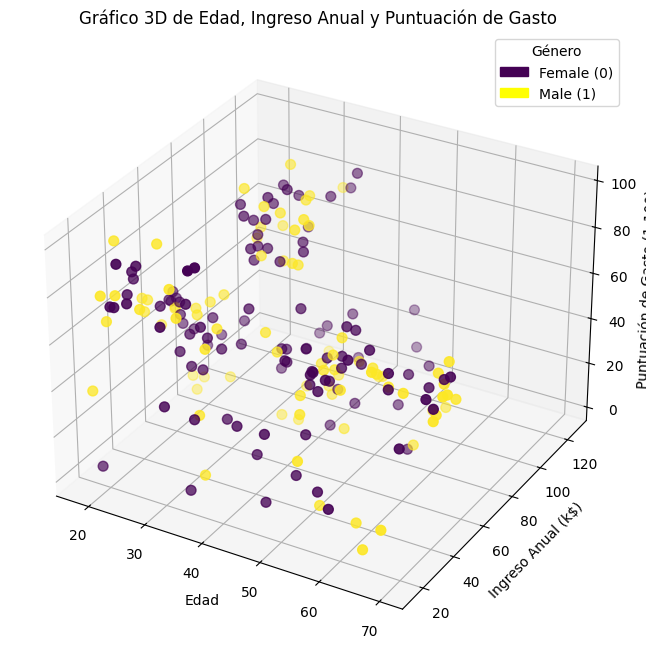

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.patches as mpatches
from sklearn.preprocessing import LabelEncoder

# Suponiendo que df ya contiene los datos, codificamos la columna "Genre" en números
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])  # Codifica 'Female' como 0 y 'Male' como 1

# Crear la figura y los ejes 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos
sc = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Genre'], cmap='viridis', s=50)

# Etiquetas de los ejes
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso Anual (k$)')
ax.set_zlabel('Puntuación de Gasto (1-100)')
ax.set_title('Gráfico 3D de Edad, Ingreso Anual y Puntuación de Gasto')

# Colores de la paleta viridis para 0 (Female) y 1 (Male)
female_color = plt.cm.viridis(0)  # Color para Female
male_color = 'yellow'

# Crear los "handles" para la leyenda
female_patch = mpatches.Patch(color=female_color, label='Female (0)')
male_patch = mpatches.Patch(color=male_color, label='Male (1)')

# Añadir la leyenda al gráfico
ax.legend(handles=[female_patch, male_patch], title="Género")

# Mostrar la gráfica
plt.show()


* Los clientes abarcan un rango de edades desde los 20 hasta los 70 años, con una mayor concentración en los 40-50 años.
* Los ingresos anuales de los clientes van desde los 20k hasta los 120k, con una mayor concentración en los niveles intermedios de 40-80k.
* Los puntajes de gasto varían desde aproximadamente 10 hasta 90, indicando una gran diversidad en los niveles de gasto de los clientes.
* En general, los clientes femeninos tienden a tener puntajes de gasto más altos que los masculinos, especialmente en los niveles de ingresos medios y altos.
* Se pueden observar algunos grupos o "racimos" de clientes con características similares en términos de edad, ingresos y puntaje de gasto.

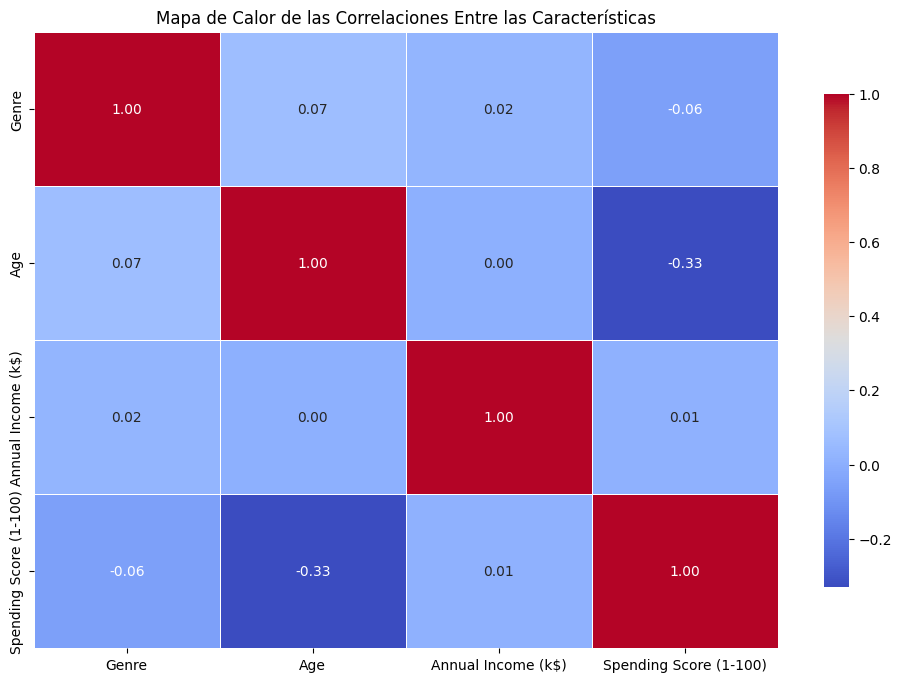

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor usando seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.8})

# Título y etiquetas
plt.title('Mapa de Calor de las Correlaciones Entre las Características')
plt.show()


Se observa que no hay una correlación fuerte entre ninguna de las variables. Los colores predominantes son cercanos al blanco y celeste, lo que sugiere que las relaciones entre las variables son muy débiles.

Algunas observaciones son:
* El Género y la Edad tienen una correlación positiva moderada (0,07).
* El Género y el Ingreso Anual tienen una correlación positiva débil (0,02).
* El Género y la Puntuación de Gasto tienen una correlación negativa débil (-0,06).
* La Edad y el Ingreso Anual no tienen correlación (0,00).
* La Edad y la Puntuación de Gasto tienen una correlación negativa moderada (-0,33).
* El Ingreso Anual y la Puntuación de Gasto tienen una correlación positiva débil (0,01).

Por tanto, las variables que tienen una correlación más fuerte son la Edad y la Puntuación de Gasto, con una correlación negativa moderada de -0,33. las variables analizadas son en gran medida independientes entre sí, ya que no existe una relación clara o significativa entre el género, la edad, el ingreso anual y la puntuación de gasto.

# Clusterización

## Dataset original

### Normalización

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Seleccionar las características
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

### K-means

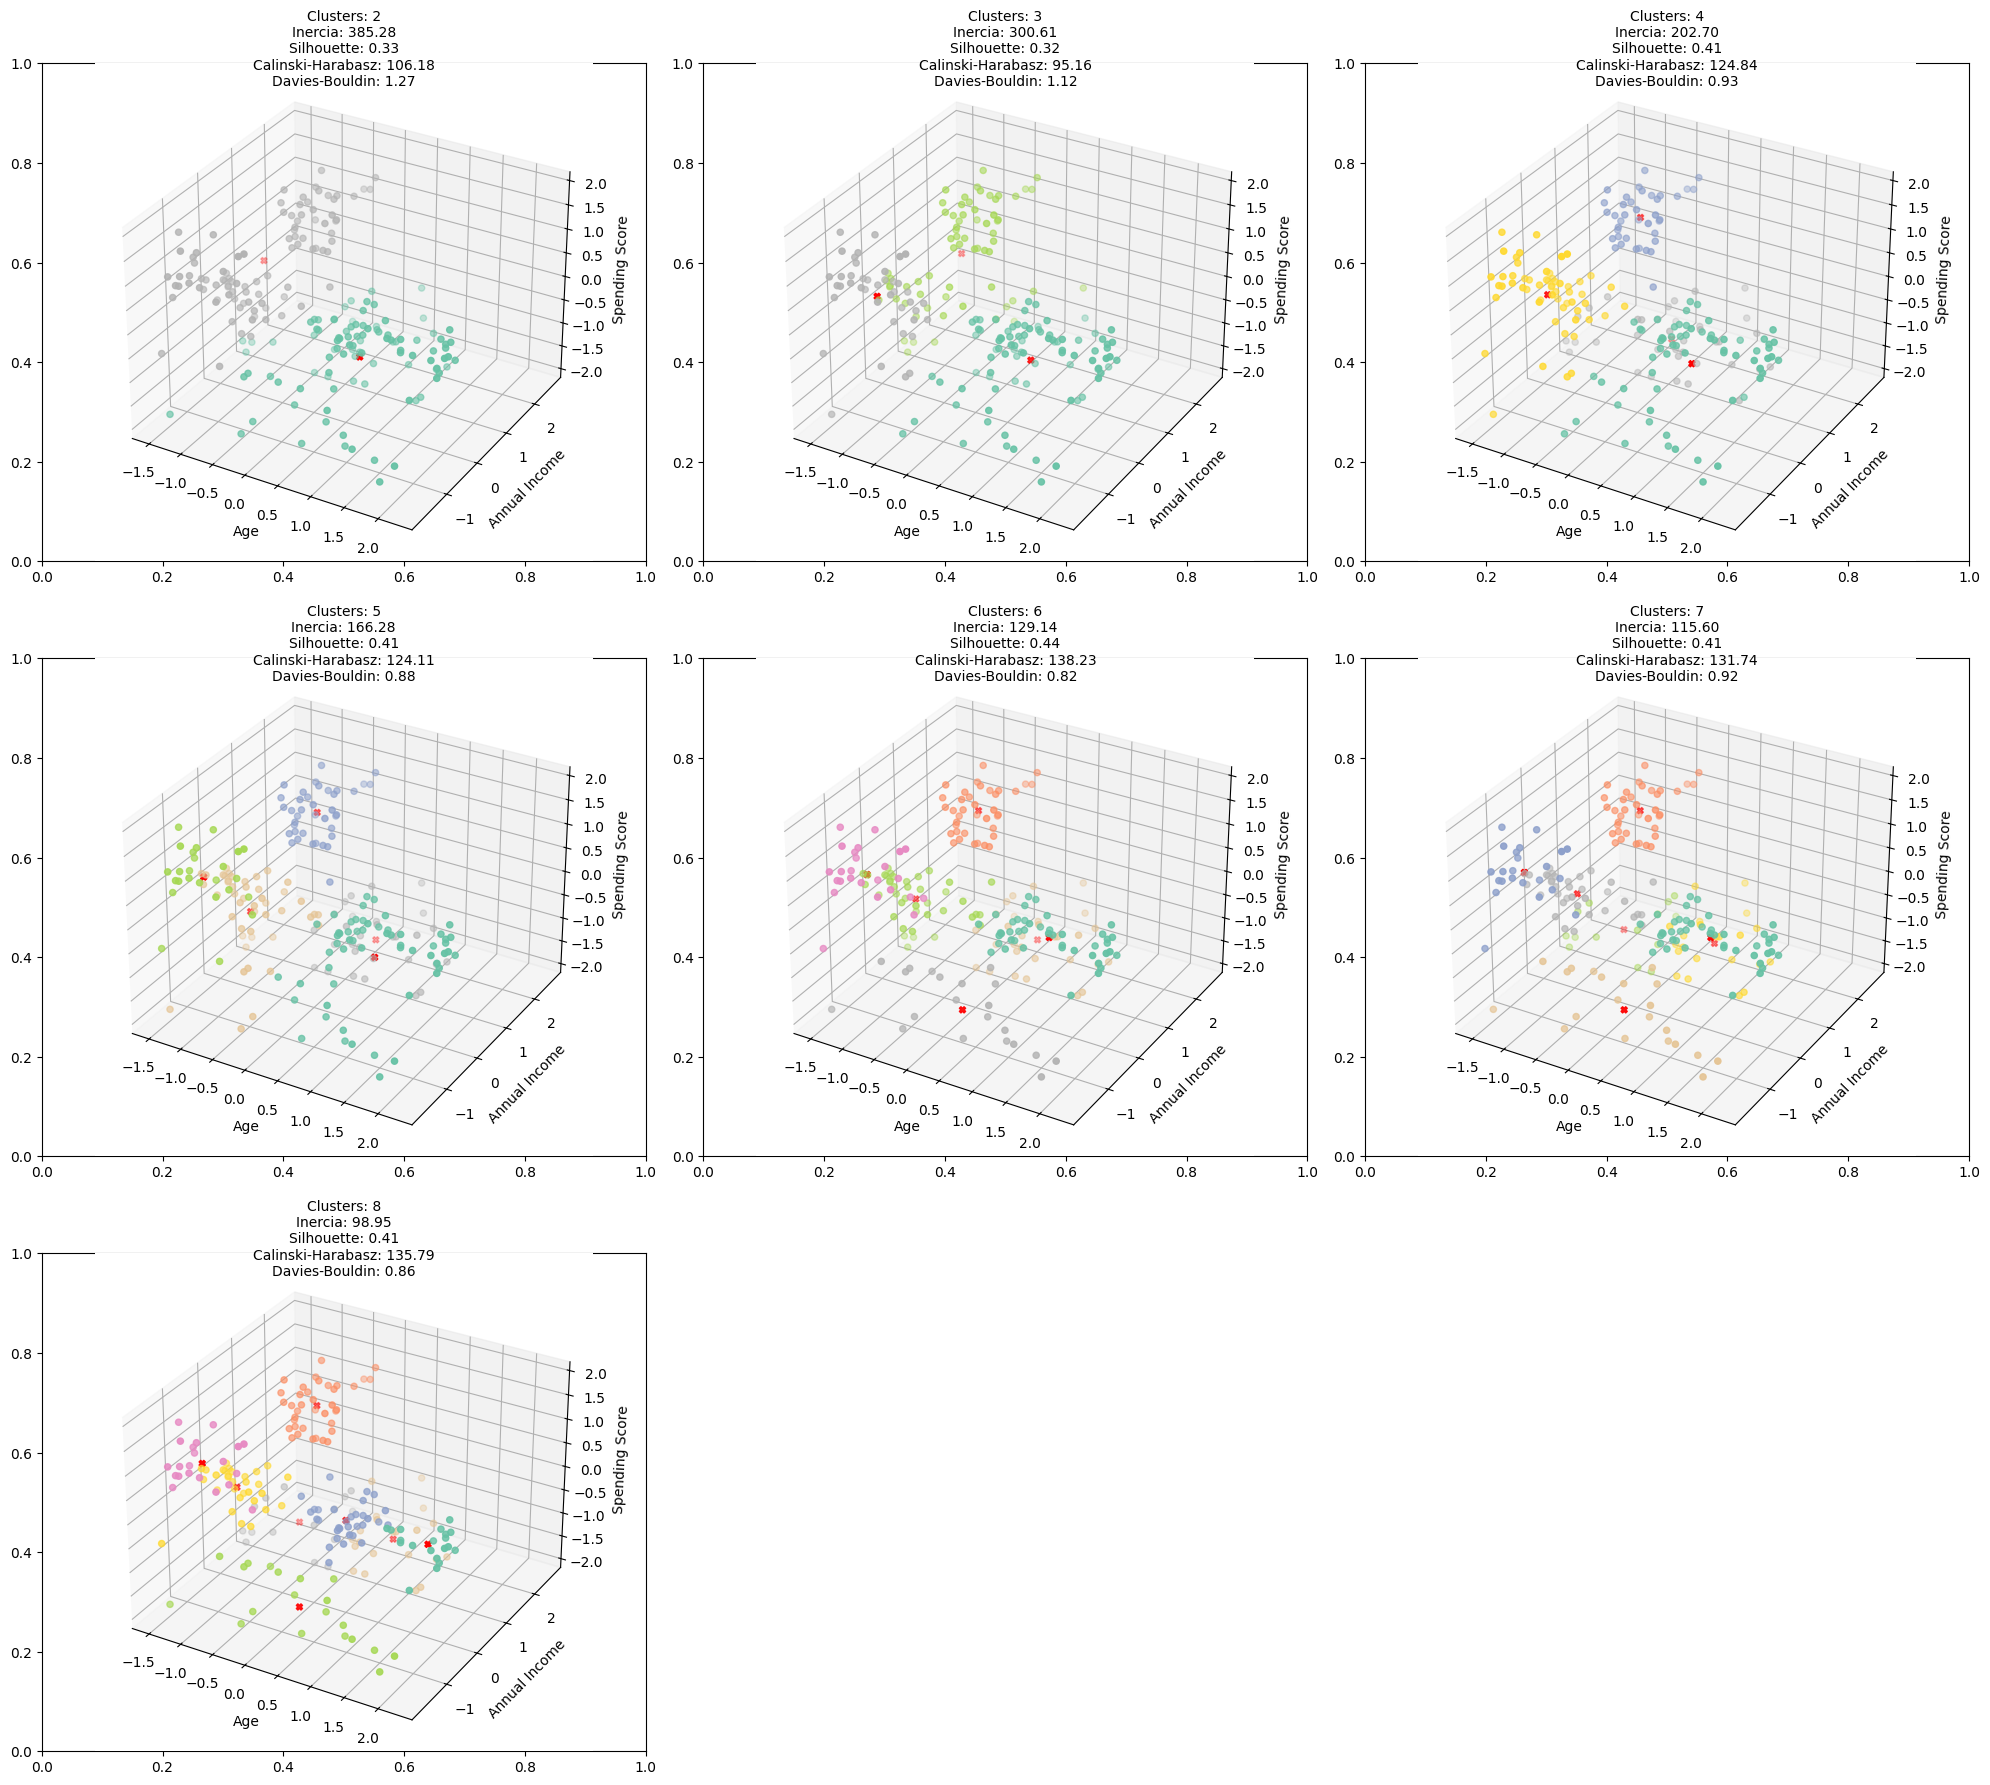

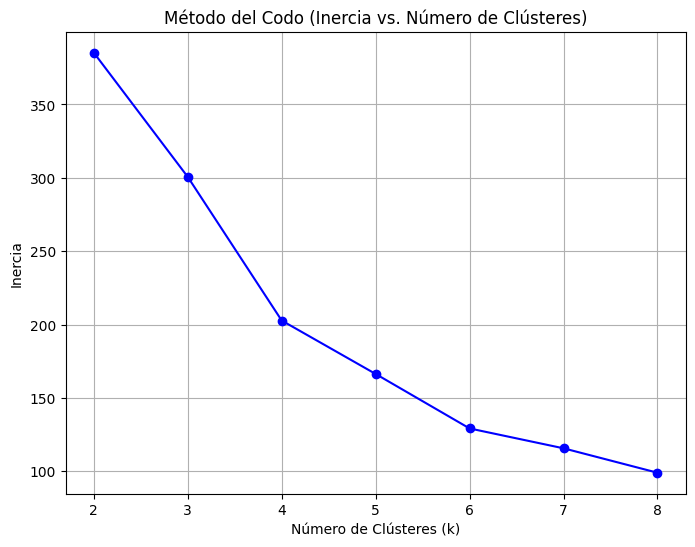

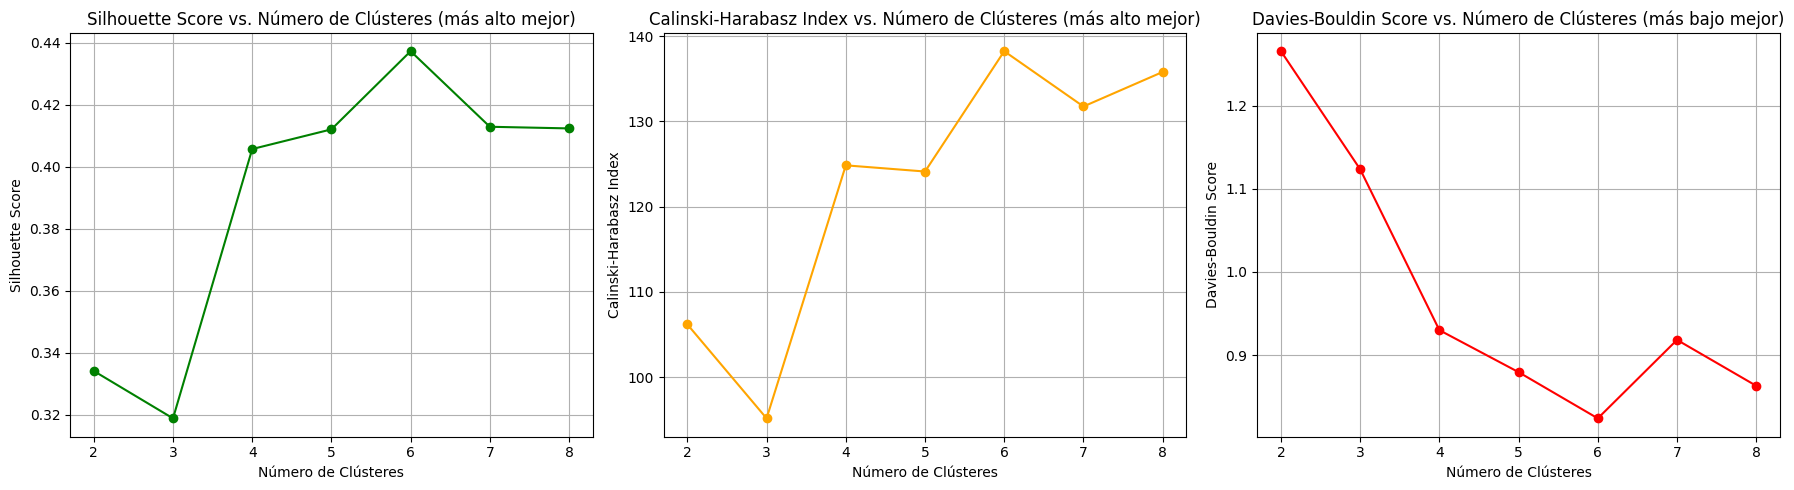

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin     Inercia
0         2    0.334070         106.179877        1.265536  385.280453
1         3    0.318774          95.159679        1.123456  300.607788
2         4    0.405723         124.837793        0.929916  202.697077
3         5    0.412085         124.112627        0.879375  166.280246
4         6    0.437316         138.225959        0.823786  129.140700
5         7    0.412916         131.740092        0.918191  115.599462
6         8    0.412387         135.788881        0.862949   98.954674


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importar para gráficos en 3D
import pandas as pd

# Inicializar almacenamiento de métricas
metrics = {
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': [],
    'Inercia': []
}

# Función para calcular y registrar métricas
def calculate_metrics(method_name, n_clusters, labels, X_scaled, inertia=None):
    metrics['Clusters'].append(n_clusters)
    metrics['Silhouette'].append(silhouette_score(X_scaled, labels))
    metrics['Calinski-Harabasz'].append(calinski_harabasz_score(X_scaled, labels))
    metrics['Davies-Bouldin'].append(davies_bouldin_score(X_scaled, labels))
    if inertia is not None:
        metrics['Inercia'].append(inertia)

# Configurar la figura para el grid de subplots con 3 filas y 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(20, 18))  # 3 filas y 3 columnas
axes = axes.flatten()

# Método del codo
inertia = []

# Probar para k=2 a k=8
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Calcular métricas
    calculate_metrics('K-Means', k, kmeans_labels, X_scaled, kmeans.inertia_)

    # Gráfico 3D de clústeres
    ax = axes[k - 2]
    ax = fig.add_subplot(3, 3, k - 1, projection='3d')  # Agregar un gráfico 3D

    # Usar las características 'Age', 'Annual Income' y 'Spending Score' para el gráfico 3D
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=kmeans_labels, cmap='Set2')

    # Añadir los centroides de los clusters en 3D
    ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', label='Centroids')

    # Etiquetas de los ejes
    ax.set_xlabel('Age')  # Etiqueta del eje X
    ax.set_ylabel('Annual Income')  # Etiqueta del eje Y
    ax.set_zlabel('Spending Score')  # Etiqueta del eje Z

    # Añadir las métricas como texto sobre cada subplot
    ax.text2D(0.5, 0.95, f'Clusters: {k}\nInercia: {kmeans.inertia_:.2f}\nSilhouette: {metrics["Silhouette"][-1]:.2f}\n'
                          f'Calinski-Harabasz: {metrics["Calinski-Harabasz"][-1]:.2f}\nDavies-Bouldin: {metrics["Davies-Bouldin"][-1]:.2f}',
                          ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    ax.grid(True)
    # Calcular inercia para el codo
    inertia.append(kmeans.inertia_)

# Desactivar los gráficos vacíos si hay menos de 9 subgráficos
for i in range(k - 1, len(axes)):
    axes[i].axis('off')  # Apagar los ejes no utilizados

# Ajustar diseño para que todo se vea bien
plt.tight_layout()

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), inertia, marker='o', color='blue')
plt.title('Método del Codo (Inercia vs. Número de Clústeres)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Gráficas de métrica de validación
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(2, 9), metrics['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Número de Clústeres (más alto mejor)')
axes[0].set_xlabel('Número de Clústeres')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(2, 9), metrics['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Número de Clústeres (más alto mejor)')
axes[1].set_xlabel('Número de Clústeres')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(2, 9), metrics['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Número de Clústeres (más bajo mejor)')
axes[2].set_xlabel('Número de Clústeres')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.437316 con k=6 clusters.
* Calinski-Harabasz: 138.225959 con k=6 clusters.
* Davies-Bouldin: 0.823786 con k=6 clusters.

El método del codo sugiere que el número óptimo de clusters puede estar entre 4 y 6.

### Agglomerative Clustering

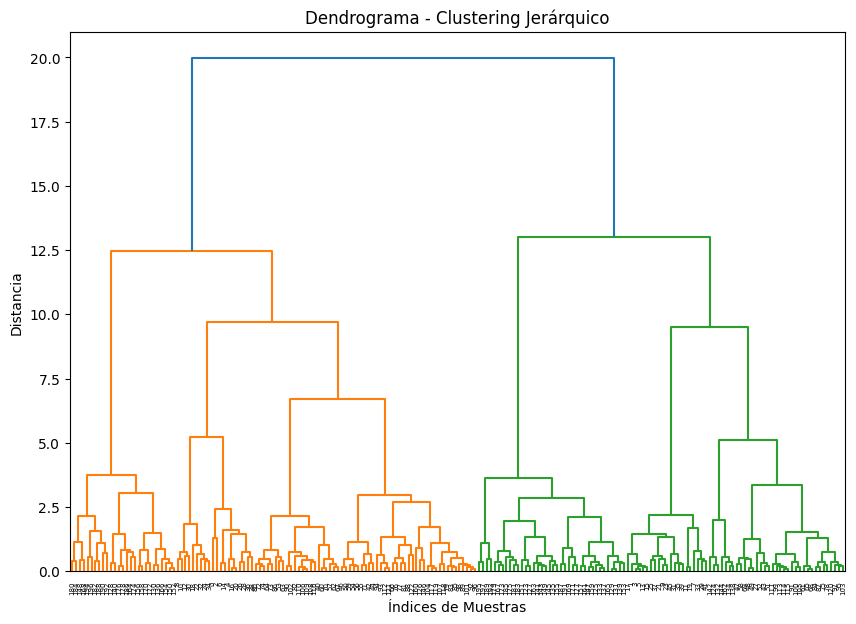

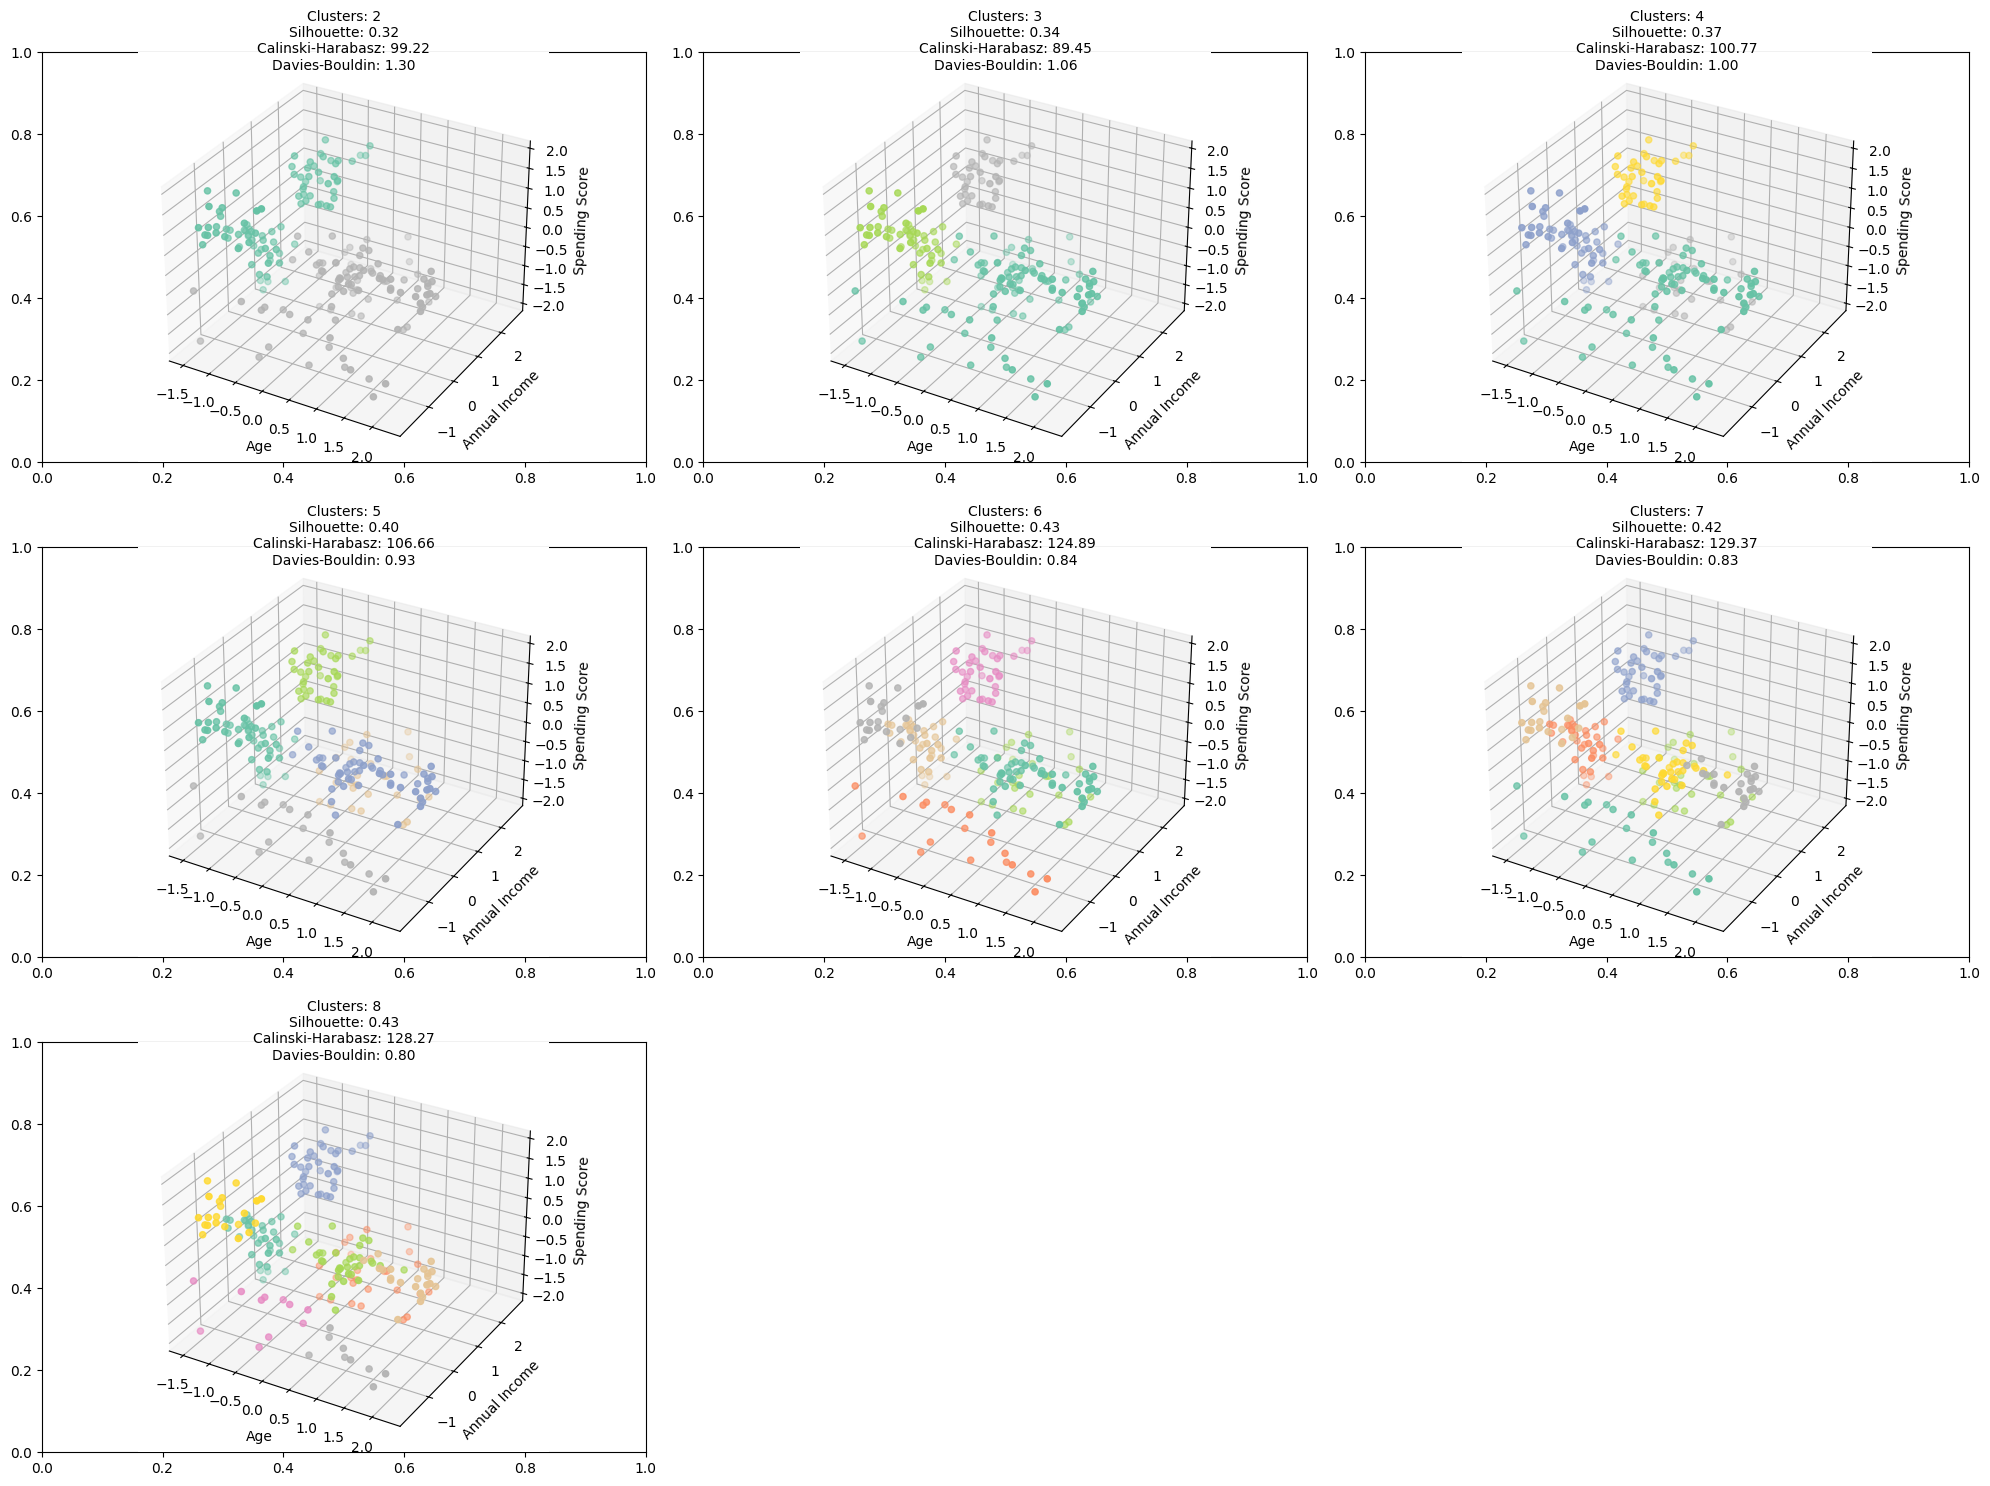

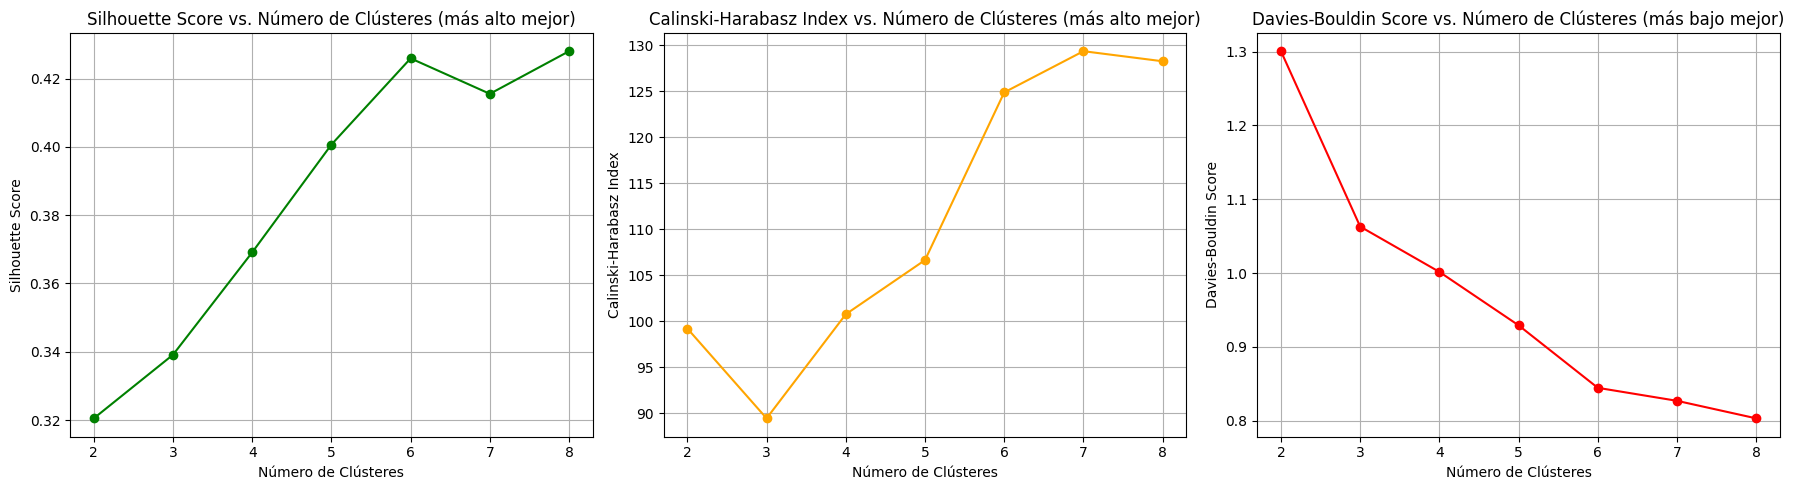

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         2    0.320484          99.220962        1.300519
1         3    0.339119          89.454739        1.063007
2         4    0.369125         100.773129        1.001621
3         5    0.400690         106.662348        0.929268
4         6    0.425948         124.891588        0.844619
5         7    0.415557         129.369861        0.827022
6         8    0.428048         128.274532        0.803267


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importar para gráficos en 3D

# Inicializar métricas
metrics = {
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Dendrograma
linked = linkage(X_scaled, 'ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia')
plt.show()

# Realizar clustering jerárquico para cada k
fig, axes = plt.subplots(3, 3, figsize=(20, 15))  # 3 filas y 3 columnas
axes = axes.flatten()

for k in range(2, 9):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)

    # Calcular métricas
    silhouette = silhouette_score(X_scaled, hierarchical_labels)
    calinski = calinski_harabasz_score(X_scaled, hierarchical_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, hierarchical_labels)

    metrics['Clusters'].append(k)
    metrics['Silhouette'].append(silhouette)
    metrics['Calinski-Harabasz'].append(calinski)
    metrics['Davies-Bouldin'].append(davies_bouldin)

    # Visualizar los clústeres en 3D
    ax = axes[k - 2]
    ax = fig.add_subplot(3, 3, k - 1, projection='3d')  # Agregar un gráfico 3D

    # Usar las características 'Age', 'Annual Income' y 'Spending Score' para el gráfico 3D
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=hierarchical_labels, cmap='Set2')

    # Añadir las métricas como texto sobre cada subplot
    ax.text2D(0.5, 0.95, f'Clusters: {k}\nSilhouette: {silhouette:.2f}\nCalinski-Harabasz: {calinski:.2f}\nDavies-Bouldin: {davies_bouldin:.2f}',
              ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    # Etiquetas de los ejes
    ax.set_xlabel('Age')  # Etiqueta del eje X
    ax.set_ylabel('Annual Income')  # Etiqueta del eje Y
    ax.set_zlabel('Spending Score')  # Etiqueta del eje Z

    ax.grid(True)

# Desactivar los gráficos vacíos si hay menos de 9 subgráficos
for i in range(k - 1, len(axes)):
    axes[i].axis('off')  # Apagar los ejes no utilizados

# Ajustar diseño para que todo se vea bien
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

# Gráficas de las métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(2, 9), metrics['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Número de Clústeres (más alto mejor)')
axes[0].set_xlabel('Número de Clústeres')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(2, 9), metrics['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Número de Clústeres (más alto mejor)')
axes[1].set_xlabel('Número de Clústeres')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(2, 9), metrics['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Número de Clústeres (más bajo mejor)')
axes[2].set_xlabel('Número de Clústeres')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.428048 con k=8 clusters.
* Calinski-Harabasz: 129.369861 con k=7 clusters.
* Davies-Bouldin: 0.803267 con k=8 clusters.

Parecen haber alrededor de 6-8 segmentos principales de clientes en función de la estructura del dendrograma.

### Gaussian Mixture Model (GMM)

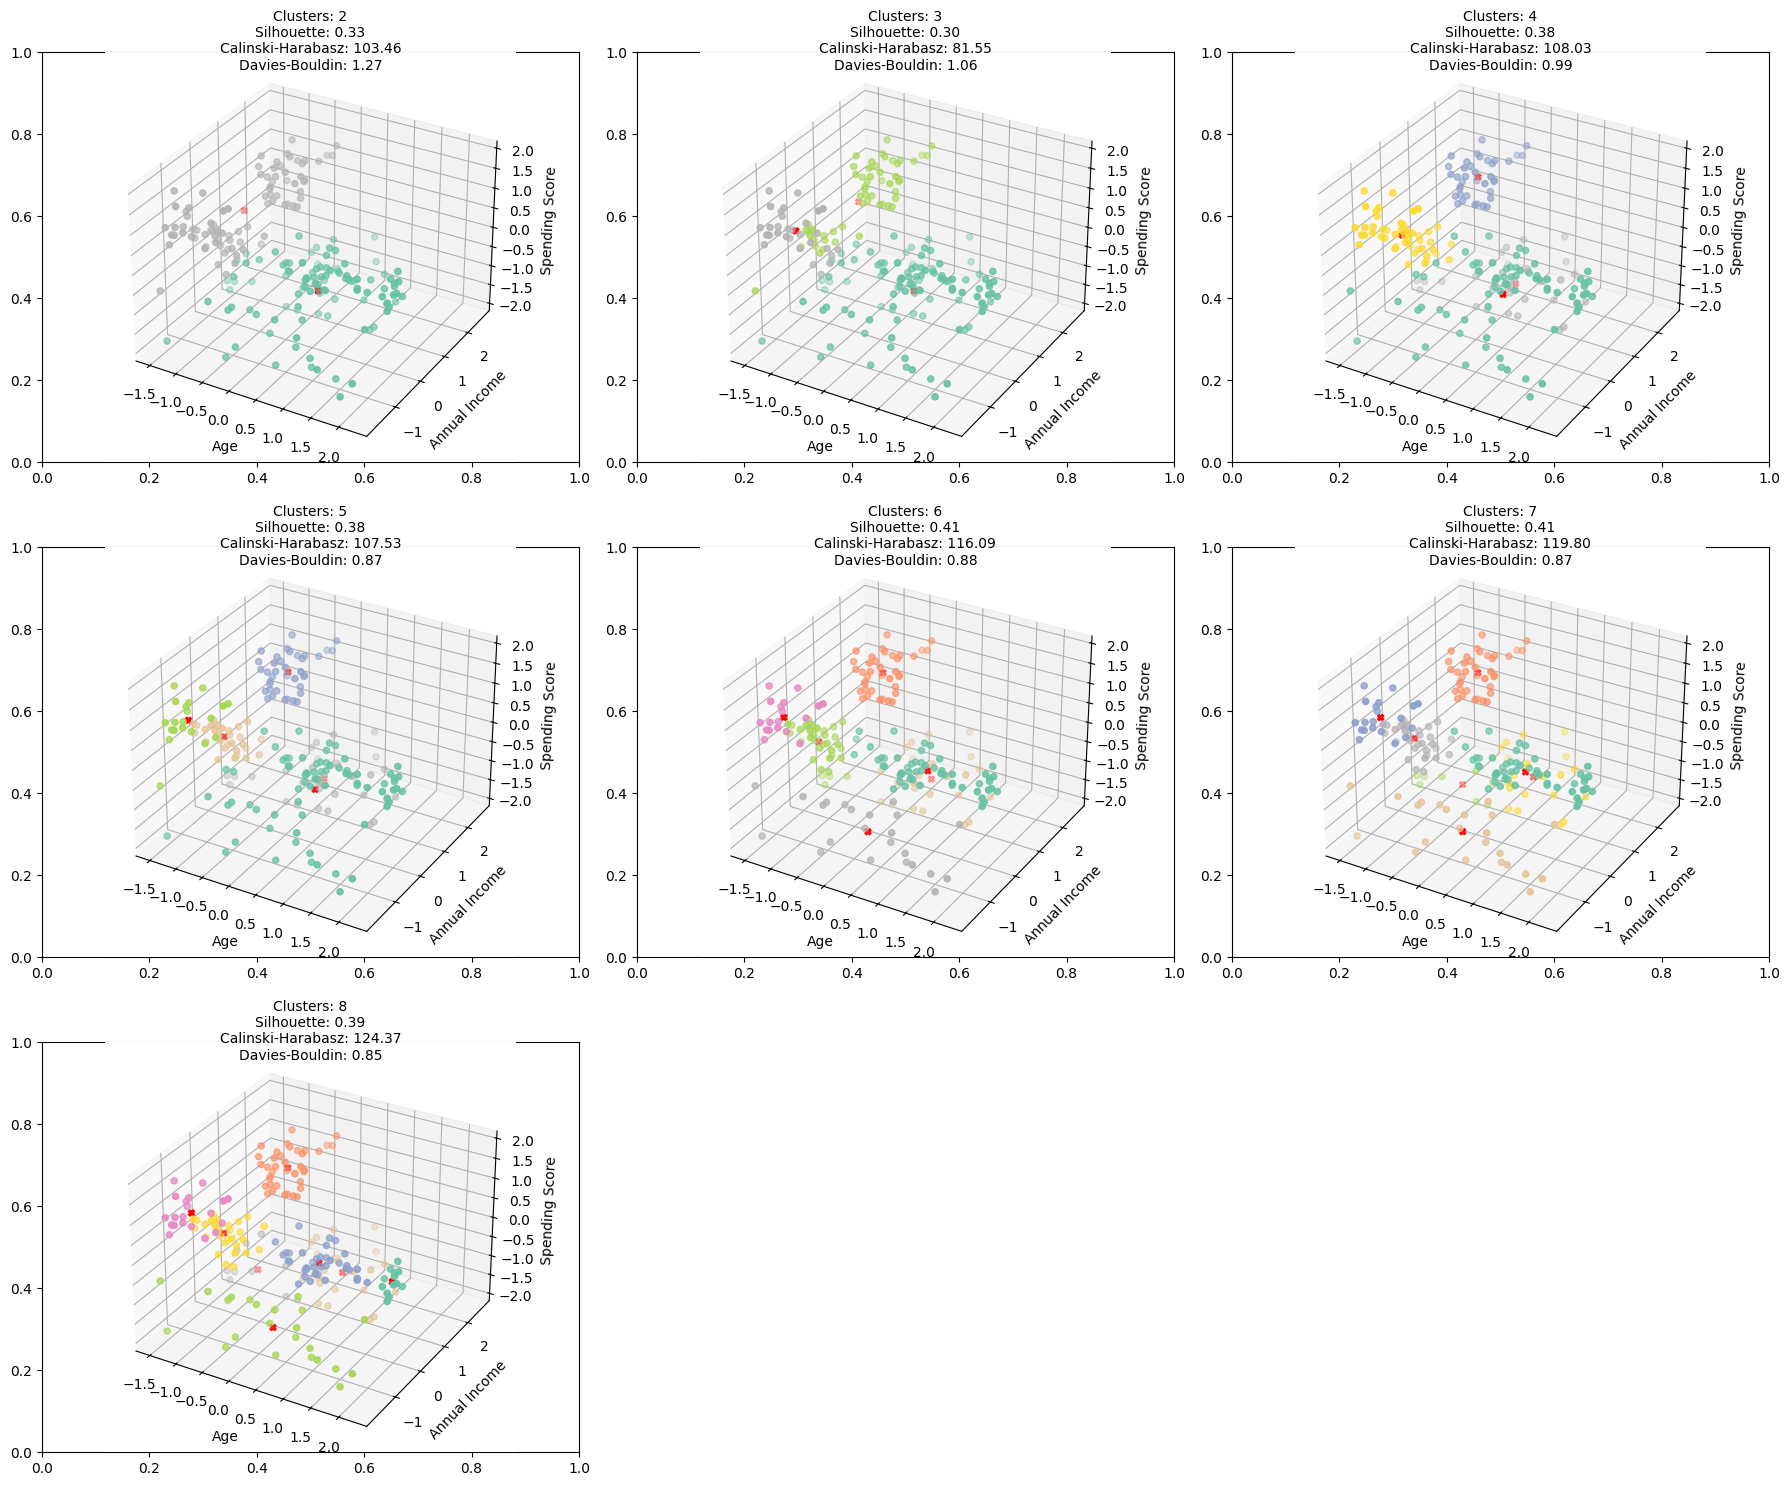

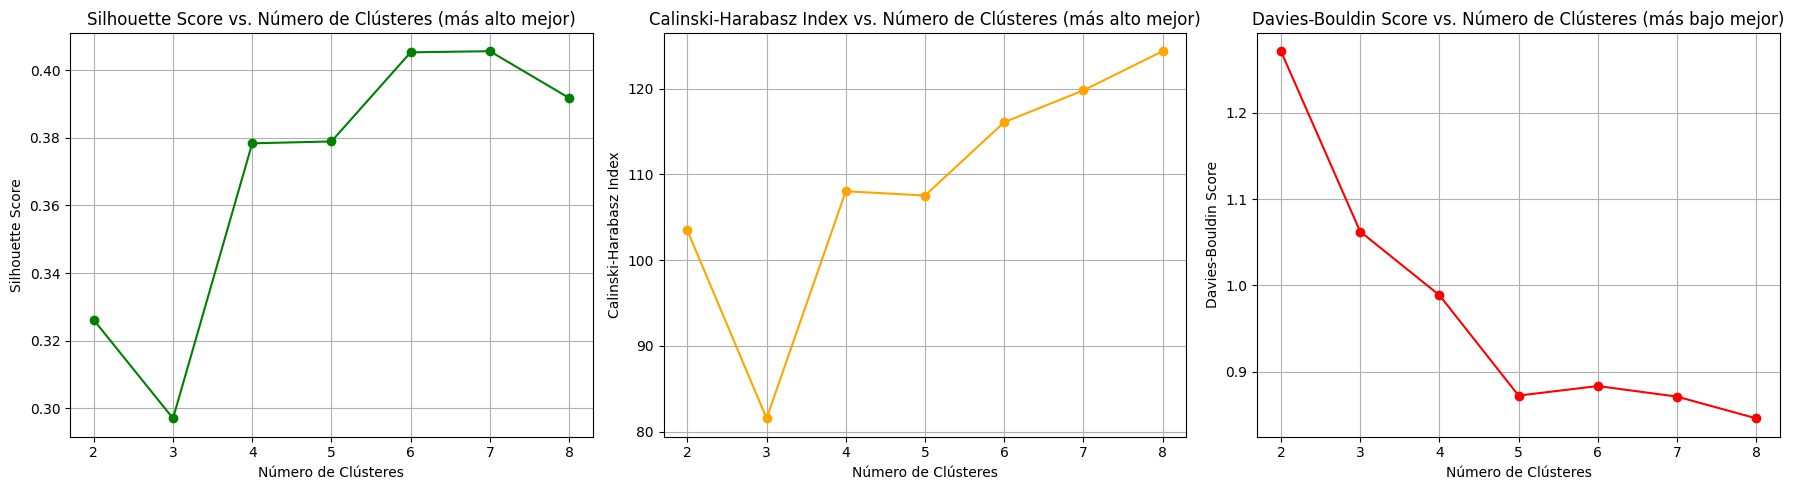

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         2    0.326157         103.457496        1.271407
1         3    0.297085          81.545076        1.062414
2         4    0.378367         108.031891        0.988640
3         5    0.378927         107.534877        0.872291
4         6    0.405264         116.085254        0.883334
5         7    0.405600         119.797616        0.871108
6         8    0.391781         124.365841        0.845886


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importar para gráficos en 3D

# Inicializar almacenamiento de métricas
metrics = {
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Realizar clustering con GMM para cada k
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)

    # Calcular métricas
    silhouette = silhouette_score(X_scaled, gmm_labels)
    calinski = calinski_harabasz_score(X_scaled, gmm_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, gmm_labels)

    metrics['Clusters'].append(k)
    metrics['Silhouette'].append(silhouette)
    metrics['Calinski-Harabasz'].append(calinski)
    metrics['Davies-Bouldin'].append(davies_bouldin)

    # Visualizar los clústeres en 3D
    ax = axes[k - 2]
    ax = fig.add_subplot(3, 3, k - 1, projection='3d')  # Agregar un gráfico 3D

    # Usar las características 'Age', 'Annual Income' y 'Spending Score' para el gráfico 3D
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=gmm_labels, cmap='Set2')

    # Añadir los centroides de los clusters en 3D
    ax.scatter(gmm.means_[:, 0], gmm.means_[:, 1], gmm.means_[:, 2], c='red', marker='X', label='Centroids')

    # Etiquetas de los ejes
    ax.set_xlabel('Age')  # Etiqueta del eje X
    ax.set_ylabel('Annual Income')  # Etiqueta del eje Y
    ax.set_zlabel('Spending Score')  # Etiqueta del eje Z

    # Añadir las métricas como texto sobre cada subplot
    ax.text2D(0.5, 0.95, f'Clusters: {k}\nSilhouette: {silhouette:.2f}\nCalinski-Harabasz: {calinski:.2f}\nDavies-Bouldin: {davies_bouldin:.2f}',
              ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    ax.grid(True)

# Desactivar los gráficos vacíos si hay menos de 9 subgráficos
for i in range(k - 1, len(axes)):
    axes[i].axis('off')  # Apagar los ejes no utilizados

# Ajustar diseño para que todo se vea bien
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

# Gráficas de las métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(2, 9), metrics['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Número de Clústeres (más alto mejor)')
axes[0].set_xlabel('Número de Clústeres')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(2, 9), metrics['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Número de Clústeres (más alto mejor)')
axes[1].set_xlabel('Número de Clústeres')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(2, 9), metrics['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Número de Clústeres (más bajo mejor)')
axes[2].set_xlabel('Número de Clústeres')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.405600 con k=7 clusters.
* Calinski-Harabasz: 119.797616 con k=7 clusters.
* Davies-Bouldin: 0.871108 con k=7 clusters.

### DBSCAN

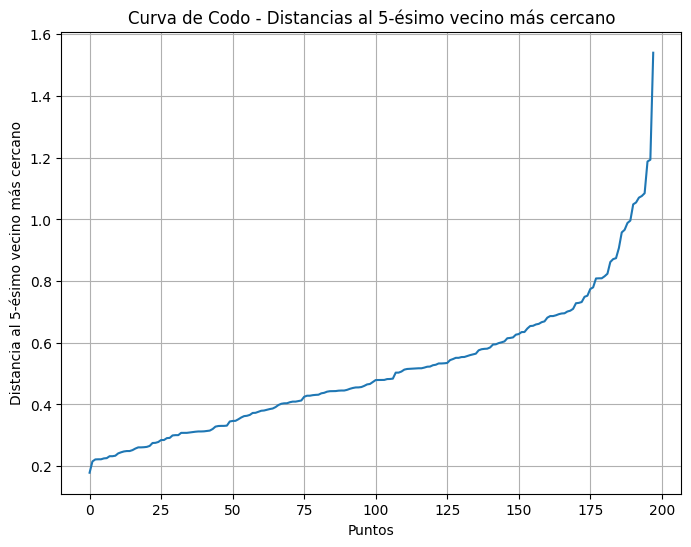

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Inicializamos el modelo de vecinos más cercanos
k = 5  # Suele elegirse k=4 o 5 dependiendo de los datos

# Ajustamos el modelo y calculamos las distancias
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)  # Usamos los datos escalados
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenamos las distancias por cada punto
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title(f"Curva de Codo - Distancias al {k}-ésimo vecino más cercano")
plt.xlabel('Puntos')
plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
plt.grid(True)
plt.show()



El método de k-distancias sugiere que el número óptimo de eps puede estar entre 0.6 y 0.8.

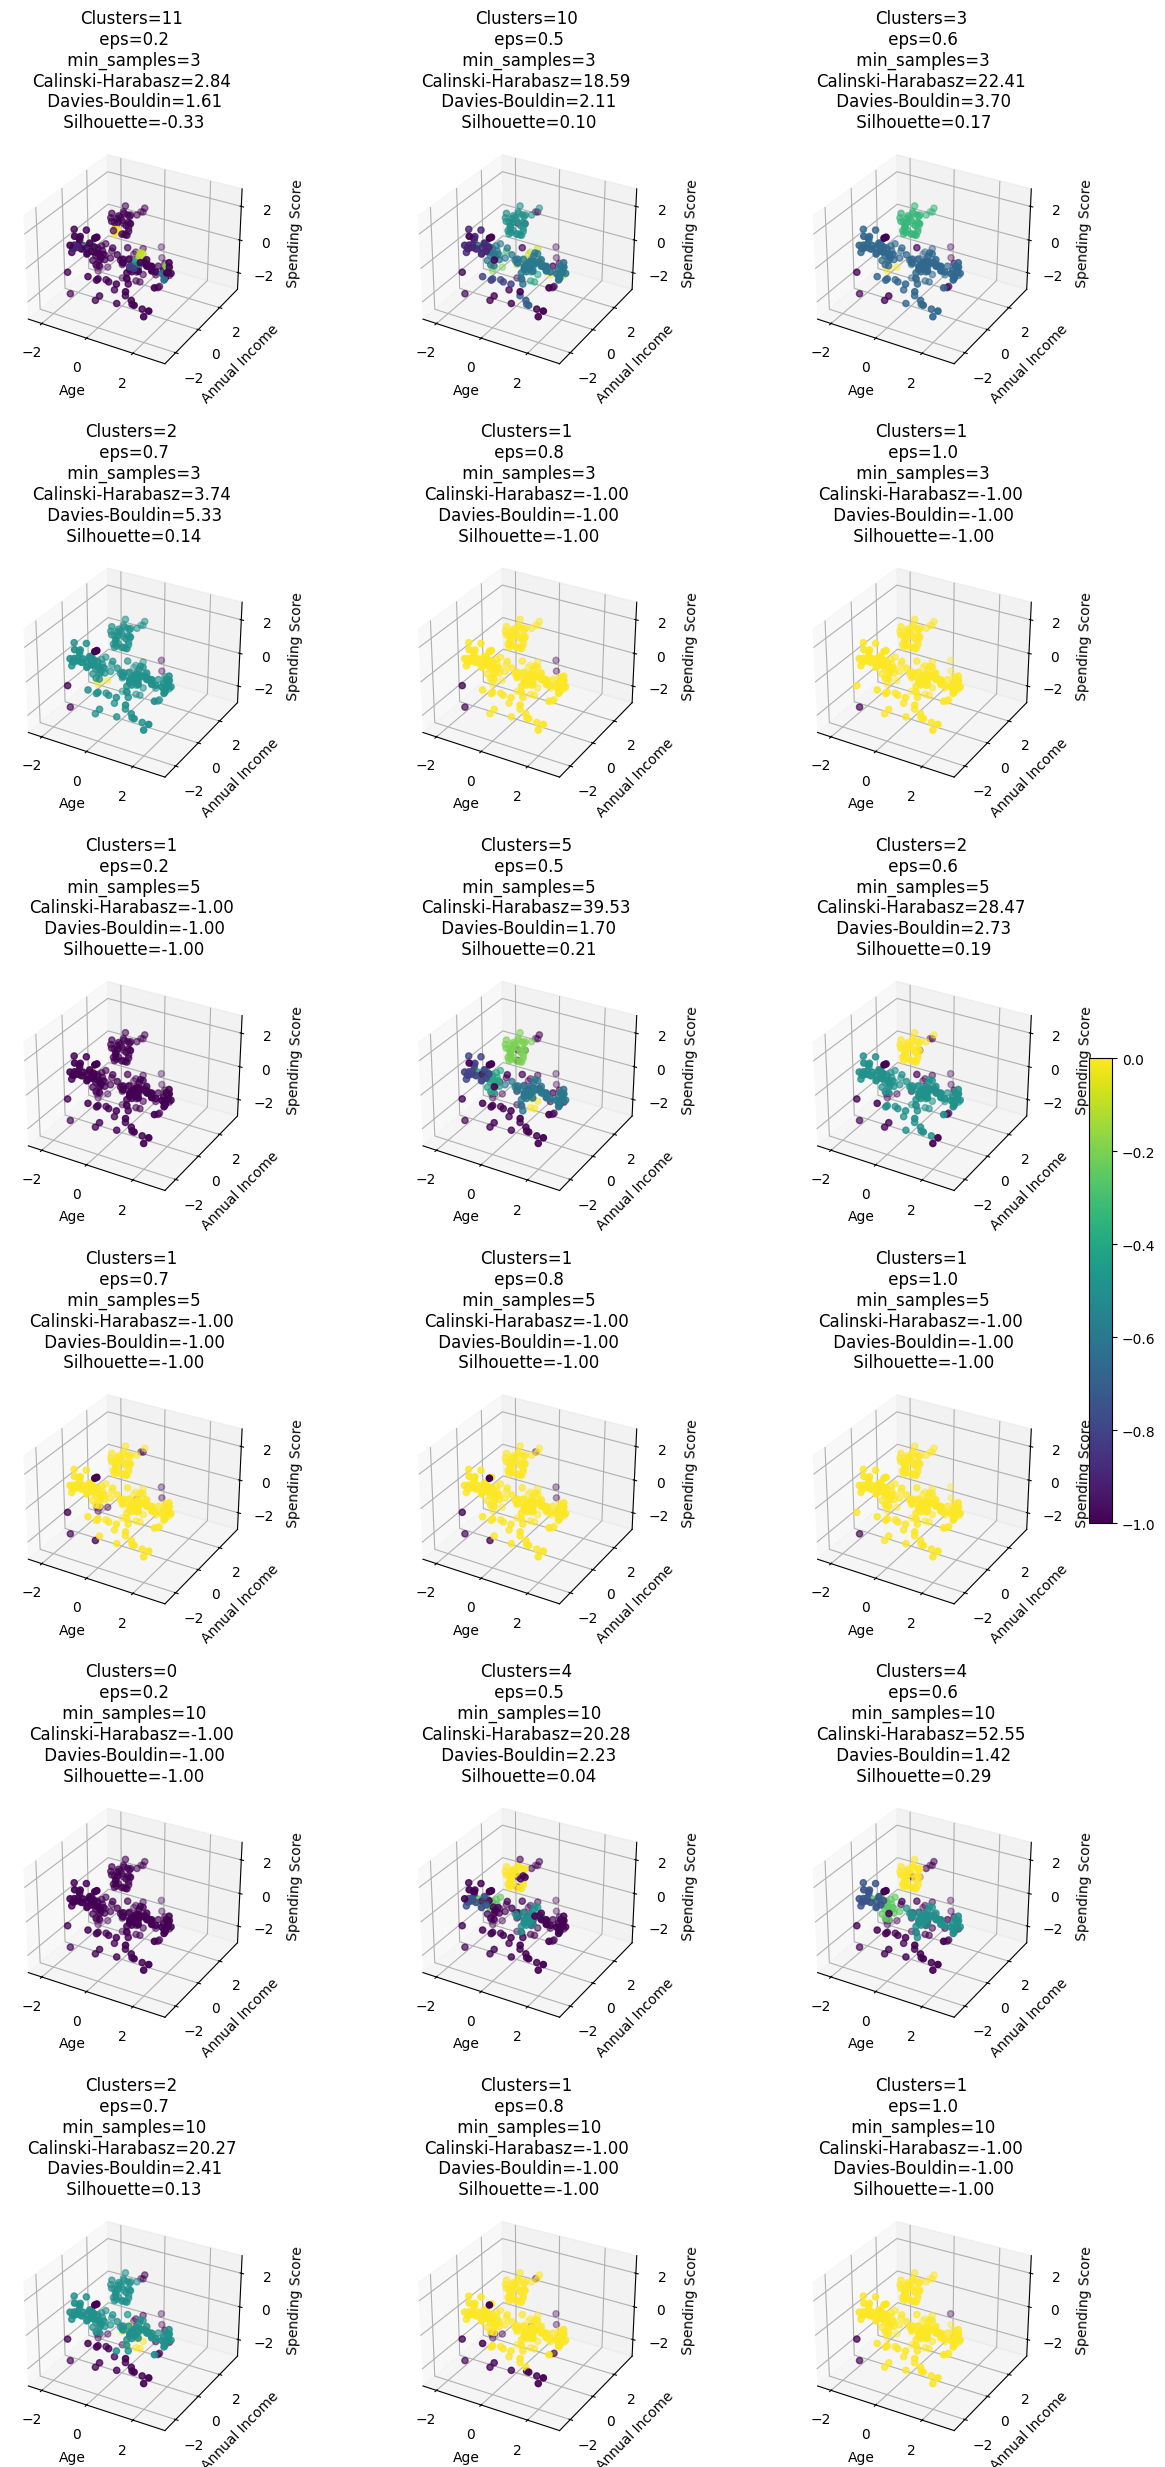

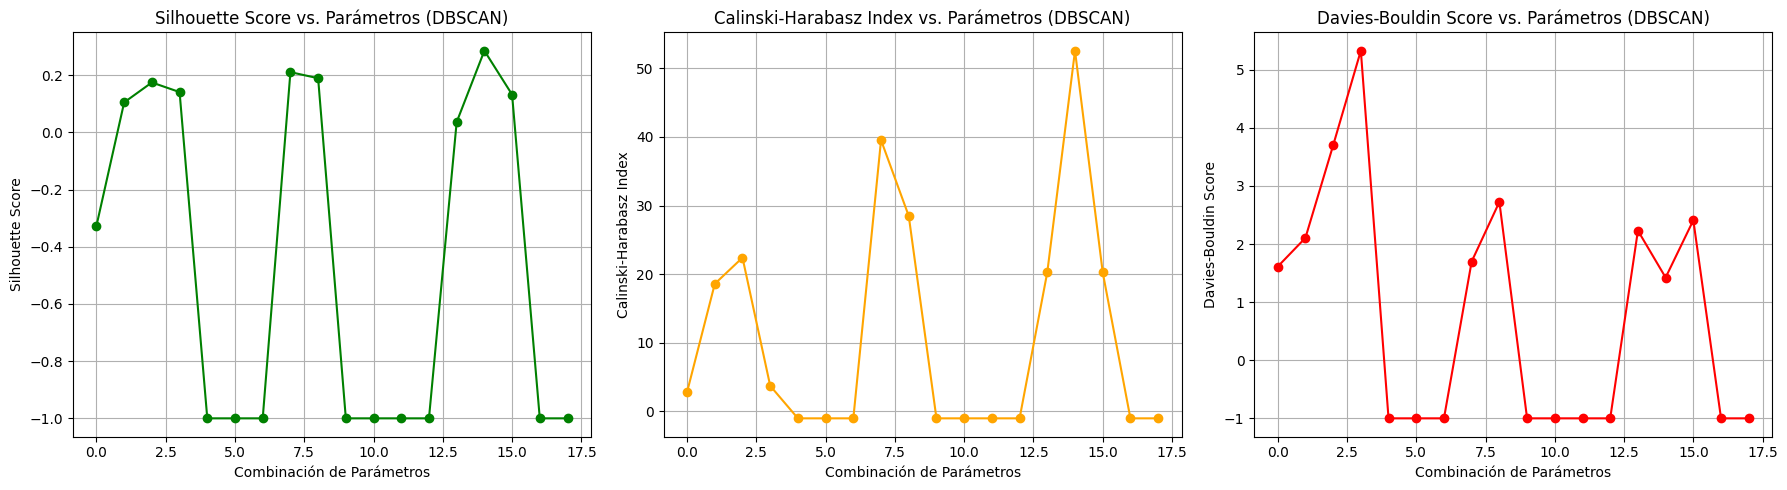

    Eps  Min_Samples  Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0   0.2            3        11   -0.326903           2.838314        1.611787
1   0.5            3        10    0.104705          18.589363        2.106148
2   0.6            3         3    0.174397          22.408497        3.697805
3   0.7            3         2    0.140744           3.735094        5.328080
4   0.8            3         1   -1.000000          -1.000000       -1.000000
5   1.0            3         1   -1.000000          -1.000000       -1.000000
6   0.2            5         1   -1.000000          -1.000000       -1.000000
7   0.5            5         5    0.210434          39.525595        1.699401
8   0.6            5         2    0.189197          28.472502        2.725058
9   0.7            5         1   -1.000000          -1.000000       -1.000000
10  0.8            5         1   -1.000000          -1.000000       -1.000000
11  1.0            5         1   -1.000000          -1.000000   

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Valores de los parámetros de DBSCAN
eps_values = [0.2, 0.5, 0.6, 0.7, 0.8, 1.0]  # Diferentes valores de epsilon (radio de vecindad)
min_samples_values = [3, 5, 10]  # Diferentes valores de min_samples

# Inicializar almacenamiento de métricas
metrics_dbscan = {
    'Eps': [],
    'Min_Samples': [],
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Número de columnas para los subgráficos (3 gráficos por fila)
n_cols = 3

# Calcular el número de filas necesarias
n_rows = (len(eps_values) * len(min_samples_values)) // n_cols + ((len(eps_values) * len(min_samples_values)) % n_cols != 0)

# Crear un grid de subgráficos
fig = plt.figure(figsize=(15, 5 * n_rows))  # Ajustar la altura de la figura para acomodar los 5x5 por gráfico

# Iterar sobre las combinaciones de eps y min_samples para llenar el grid de subgráficos
for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        # Aplicar DBSCAN con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Filtrar los puntos de ruido (-1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Eliminar ruido (-1) de la cuenta de clusters

        # Cálculo de las métricas de clustering si hay más de un cluster
        if n_clusters > 1:
            ch_score = calinski_harabasz_score(X_scaled, labels)  # Calinski-Harabasz
            db_score = davies_bouldin_score(X_scaled, labels)  # Davies-Bouldin
            try:
                silhouette_avg = silhouette_score(X_scaled, labels)  # Silhouette
            except ValueError:  # Puede fallar si solo hay un cluster
                silhouette_avg = -1
        else:
            ch_score = -1
            db_score = -1
            silhouette_avg = -1

        # Almacenar métricas
        metrics_dbscan['Eps'].append(eps)
        metrics_dbscan['Min_Samples'].append(min_samples)
        metrics_dbscan['Clusters'].append(n_clusters)
        metrics_dbscan['Silhouette'].append(silhouette_avg)
        metrics_dbscan['Calinski-Harabasz'].append(ch_score)
        metrics_dbscan['Davies-Bouldin'].append(db_score)

        # Crear un subgráfico 3D en la posición correcta
        ax = fig.add_subplot(n_rows, n_cols, i * len(eps_values) + j + 1, projection='3d')

        # Graficar los resultados en 3D
        scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=labels, cmap='viridis', s=20)

        # Título y etiquetas, ahora con el número de clusters
        ax.set_title(f"Clusters={n_clusters}\n eps={eps}\n min_samples={min_samples}\n"
                     f"Calinski-Harabasz={ch_score:.2f}\n Davies-Bouldin={db_score:.2f}\n Silhouette={silhouette_avg:.2f}")
        ax.set_xlabel("Age")
        ax.set_ylabel("Annual Income")
        ax.set_zlabel("Spending Score")

        # Ajustar los límites de los ejes
        ax.set_xlim([X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1])
        ax.set_ylim([X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1])
        ax.set_zlim([X_scaled[:, 2].min() - 1, X_scaled[:, 2].max() + 1])

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(hspace=0.7, wspace=0.3)  # Ajusta el espacio entre filas (hspace) y columnas (wspace)

# Añadir barra de colores
fig.colorbar(scatter, ax=fig.get_axes(), orientation='vertical', fraction=0.02, pad=0.04)

# Mostrar el gráfico
plt.show()

# Gráficas de las métricas para DBSCAN
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(len(metrics_dbscan['Silhouette'])), metrics_dbscan['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Parámetros (DBSCAN)')
axes[0].set_xlabel('Combinación de Parámetros')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(len(metrics_dbscan['Calinski-Harabasz'])), metrics_dbscan['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Parámetros (DBSCAN)')
axes[1].set_xlabel('Combinación de Parámetros')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(len(metrics_dbscan['Davies-Bouldin'])), metrics_dbscan['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Parámetros (DBSCAN)')
axes[2].set_xlabel('Combinación de Parámetros')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_dbscan_df = pd.DataFrame(metrics_dbscan)
print(metrics_dbscan_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.285372 con eps=0.6, min_samples=10 y clusters=4.
* Calinski-Harabasz: 52.546040 con eps=0.6, min_samples=10 y clusters=4.
* Davies-Bouldin: 1.423567 con eps=0.6, min_samples=10 y clusters=4.

### Affinity Propagation

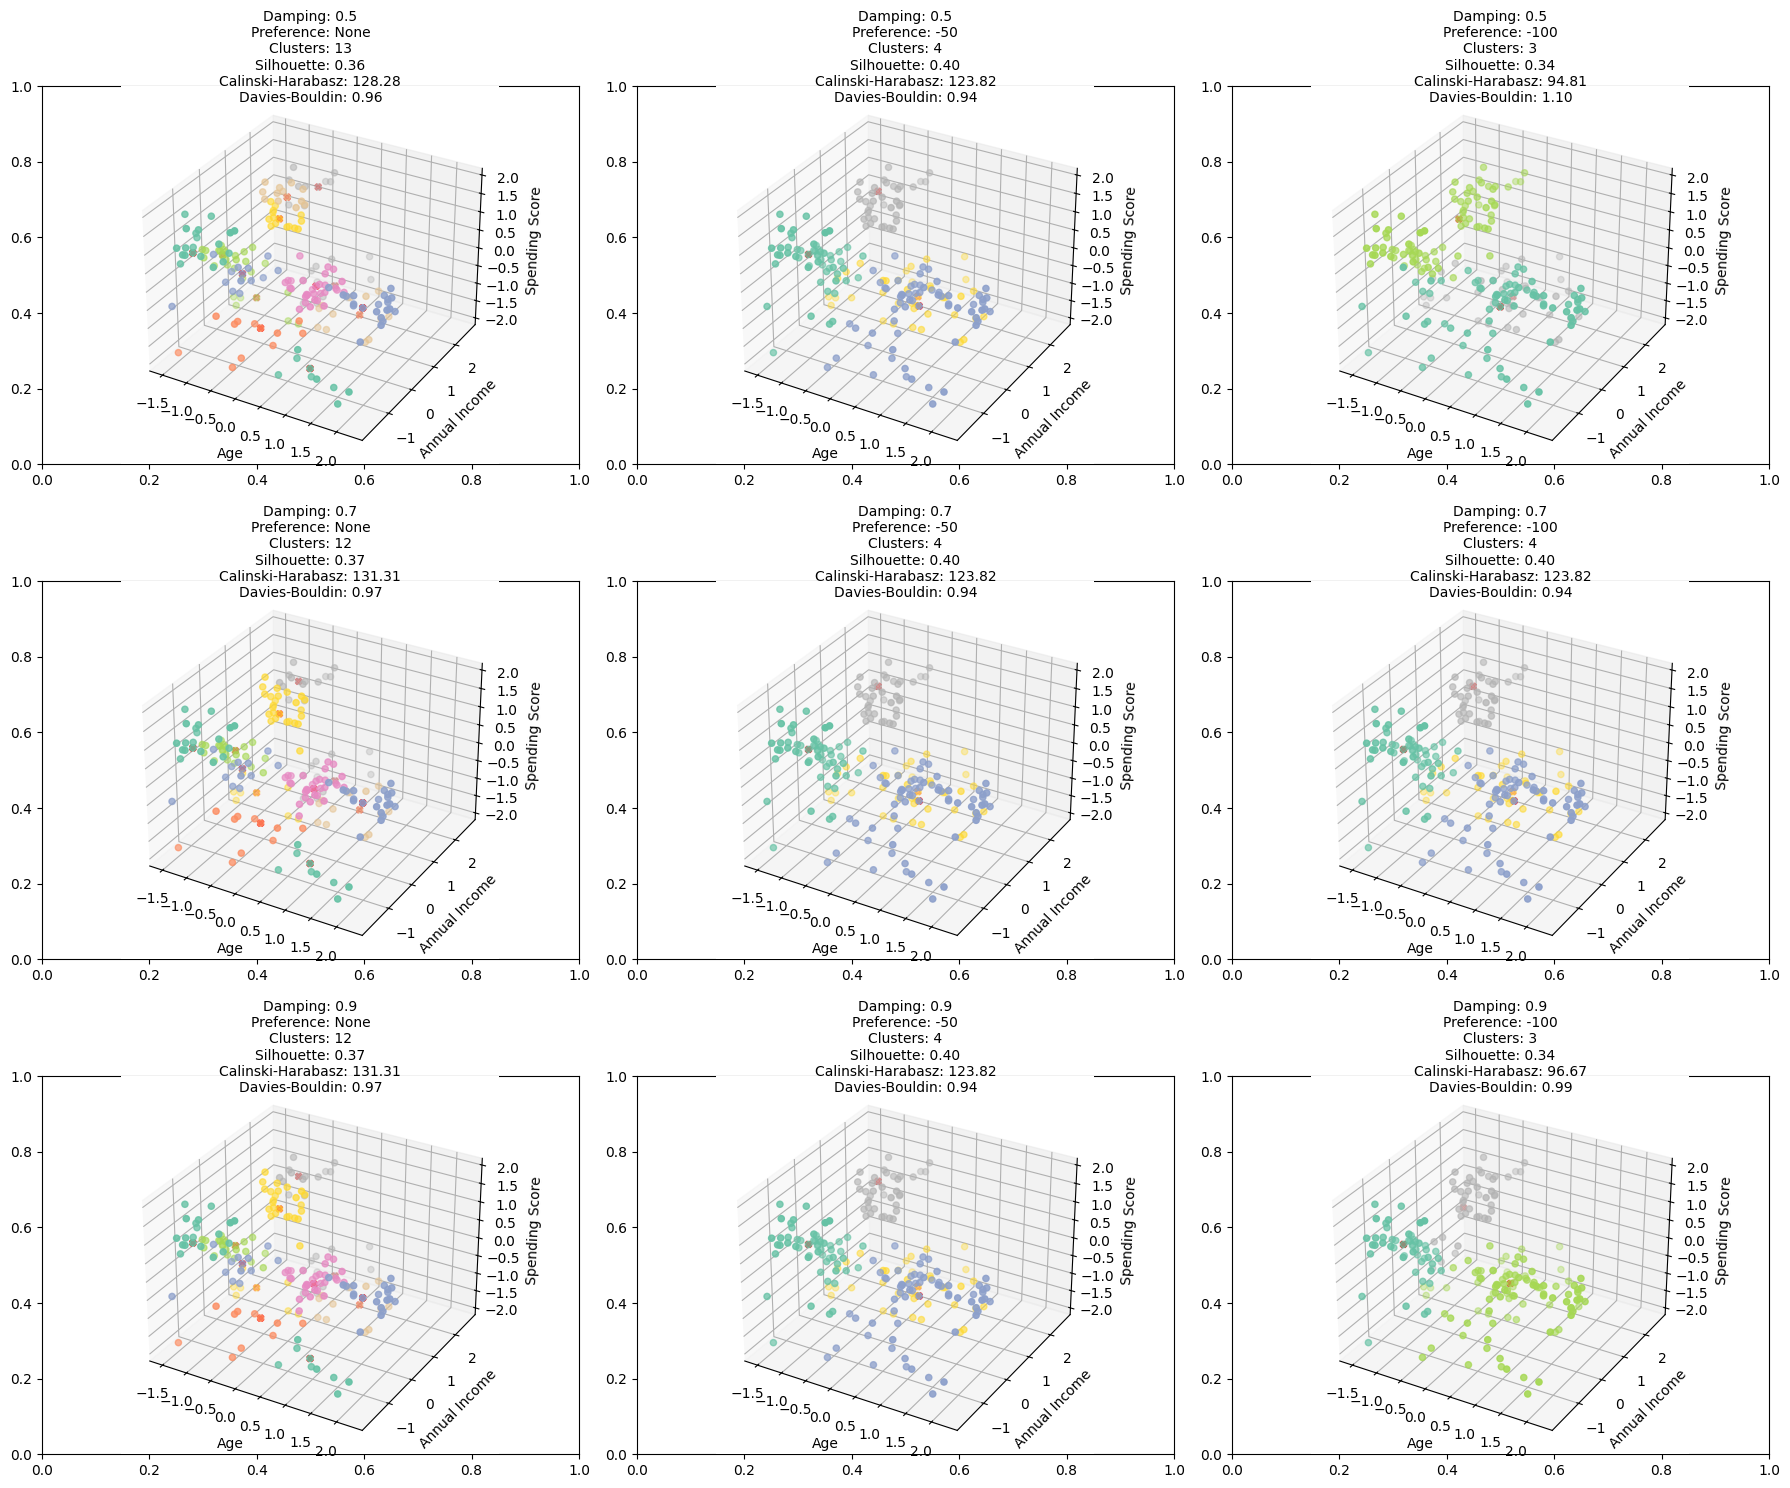

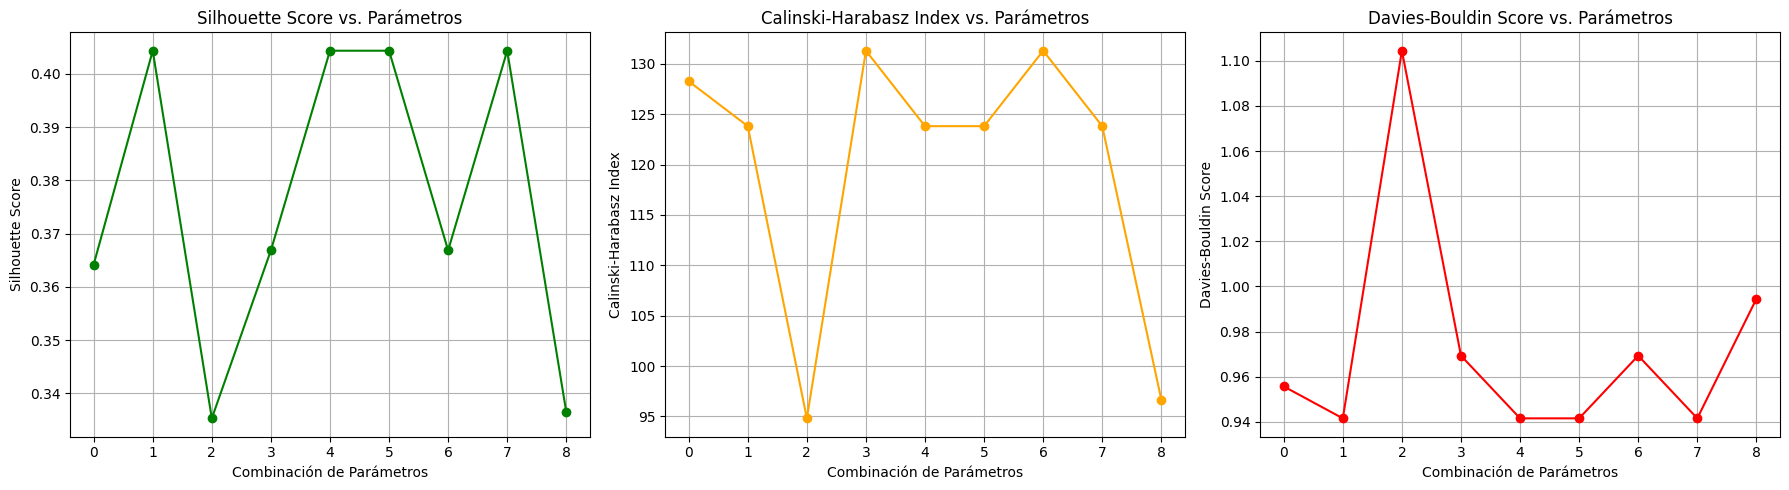

   Damping  Preference   Affinity  Clusters  Silhouette  Calinski-Harabasz  \
0      0.5         NaN  euclidean        13    0.364177         128.276761   
1      0.5       -50.0  euclidean         4    0.404354         123.816043   
2      0.5      -100.0  euclidean         3    0.335284          94.812302   
3      0.7         NaN  euclidean        12    0.366839         131.307307   
4      0.7       -50.0  euclidean         4    0.404354         123.816043   
5      0.7      -100.0  euclidean         4    0.404354         123.816043   
6      0.9         NaN  euclidean        12    0.366839         131.307307   
7      0.9       -50.0  euclidean         4    0.404354         123.816043   
8      0.9      -100.0  euclidean         3    0.336460          96.665855   

   Davies-Bouldin  
0        0.955687  
1        0.941534  
2        1.104497  
3        0.969319  
4        0.941534  
5        0.941534  
6        0.969319  
7        0.941534  
8        0.994483  


In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importar para gráficos en 3D
import pandas as pd
import numpy as np

# Inicializar almacenamiento de métricas
metrics = {
    'Damping': [],
    'Preference': [],
    'Affinity': [],
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Crear un rango de valores para los parámetros
damping_values = [0.5, 0.7, 0.9]
preference_values = [None, -50, -100]  # None usa el valor por defecto
affinity_values = ['euclidean']

# Realizar clustering con Affinity Propagation
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Probar diferentes combinaciones de parámetros
combinations = [(d, p, a) for d in damping_values for p in preference_values for a in affinity_values]

for idx, (damping, preference, affinity) in enumerate(combinations):
    affinity_model = AffinityPropagation(damping=damping, preference=preference, affinity=affinity, random_state=42)
    affinity_labels = affinity_model.fit_predict(X_scaled)

    # Calcular métricas
    silhouette = silhouette_score(X_scaled, affinity_labels)
    calinski = calinski_harabasz_score(X_scaled, affinity_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, affinity_labels)

    metrics['Damping'].append(damping)
    metrics['Preference'].append(preference)
    metrics['Affinity'].append(affinity)
    metrics['Clusters'].append(len(np.unique(affinity_labels)))
    metrics['Silhouette'].append(silhouette)
    metrics['Calinski-Harabasz'].append(calinski)
    metrics['Davies-Bouldin'].append(davies_bouldin)

    # Visualizar los clústeres en 3D
    ax = axes[idx]
    ax = fig.add_subplot(3, 3, idx + 1, projection='3d')  # Agregar un gráfico 3D

    # Usar las características 'Age', 'Annual Income' y 'Spending Score' para el gráfico 3D
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], X_scaled[:, 2], c=affinity_labels, cmap='Set2')

    # Añadir los centroides de los clusters en 3D
    cluster_centers = affinity_model.cluster_centers_
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], c='red', marker='X', label='Centroids')

    # Etiquetas de los ejes
    ax.set_xlabel('Age')  # Etiqueta del eje X
    ax.set_ylabel('Annual Income')  # Etiqueta del eje Y
    ax.set_zlabel('Spending Score')  # Etiqueta del eje Z

    # Añadir las métricas como texto sobre cada subplot
    ax.text2D(0.5, 0.95, f'Damping: {damping}\nPreference: {preference}\nClusters: {len(np.unique(affinity_labels))}\nSilhouette: {silhouette:.2f}\nCalinski-Harabasz: {calinski:.2f}\nDavies-Bouldin: {davies_bouldin:.2f}',
              ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    ax.grid(True)

# Desactivar los gráficos vacíos si hay menos de 9 subgráficos
for i in range(len(combinations), len(axes)):
    axes[i].axis('off')  # Apagar los ejes no utilizados

# Ajustar diseño para que todo se vea bien
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

# Gráficas de las métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(len(combinations)), metrics['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Parámetros')
axes[0].set_xlabel('Combinación de Parámetros')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(len(combinations)), metrics['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Parámetros')
axes[1].set_xlabel('Combinación de Parámetros')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(len(combinations)), metrics['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Parámetros')
axes[2].set_xlabel('Combinación de Parámetros')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.404354 con damping=0.5, preference=-50.0, affinity=euclidean y clusters=4.
* Calinski-Harabasz: 131.307307 con damping=0.7, preference=None, affinity=euclidean y clusters=12.
* Davies-Bouldin: 0.941534 con damping=0.5, preference=-50.0, affinity=euclidean y clusters=4.

## Dataset con Autoencoder

### Normalización

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

le = LabelEncoder()
df["Genre"] = le.fit_transform(df["Genre"])

# Seleccionar las características
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4801  
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9750 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7977 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6580 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5973 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5699 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4755 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4500 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3894  
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3829 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3427 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3314 
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3292 
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2780 
Epoch 15/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2273 
Ep

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
MSE Undercomplete Autoencoder: 0.23533752486700218
Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.4704  
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9101 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6271 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4879 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3332 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2278 
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2243 
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1585 
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1501 
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1056 
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0934 
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0976 
Epoch 13/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0613 
Epoch 14/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

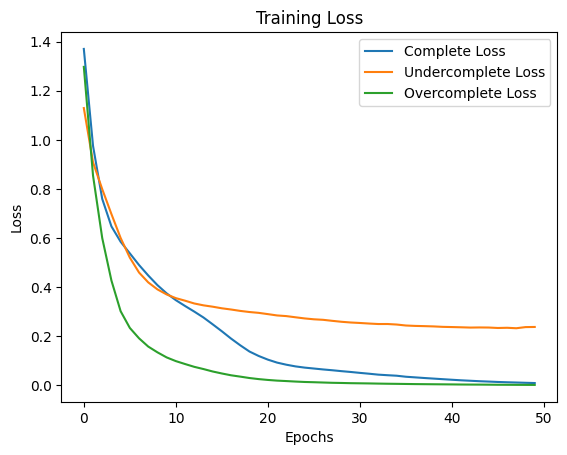

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# Parámetros
input_dim = X_scaled.shape[1]  # Dimensión de entrada (3)

# === COMPLETE AUTOENCODER ===
complete_input = Input(shape=(input_dim,))
complete_encoded = Dense(input_dim, activation='relu')(complete_input)  # Mismo tamaño que la entrada
complete_decoded = Dense(input_dim, activation='linear')(complete_encoded)

complete_autoencoder = Model(complete_input, complete_decoded)
complete_autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
complete_history = complete_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, verbose=1)  # Cambié verbose=1

# Capa de codificación para extracción de características
complete_encoder = Model(complete_input, complete_encoded)
complete_latent = complete_encoder.predict(X_scaled)

# Calcular MSE para Complete Autoencoder
complete_predictions = complete_autoencoder.predict(X_scaled)
complete_mse = mean_squared_error(X_scaled, complete_predictions)
print(f"MSE Complete Autoencoder: {complete_mse}")

# === UNDERCOMPLETE AUTOENCODER ===
undercomplete_input = Input(shape=(input_dim,))
undercomplete_encoded = Dense(2, activation='relu')(undercomplete_input)  # Reducido a 2 dimensiones
undercomplete_decoded = Dense(input_dim, activation='linear')(undercomplete_encoded)

undercomplete_autoencoder = Model(undercomplete_input, undercomplete_decoded)
undercomplete_autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
undercomplete_history = undercomplete_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, verbose=1)  # Cambié verbose=1

# Capa de codificación para extracción de características
undercomplete_encoder = Model(undercomplete_input, undercomplete_encoded)
undercomplete_latent = undercomplete_encoder.predict(X_scaled)

# Calcular MSE para Undercomplete Autoencoder
undercomplete_predictions = undercomplete_autoencoder.predict(X_scaled)
undercomplete_mse = mean_squared_error(X_scaled, undercomplete_predictions)
print(f"MSE Undercomplete Autoencoder: {undercomplete_mse}")

# === OVERCOMPLETE AUTOENCODER ===
overcomplete_input = Input(shape=(input_dim,))
overcomplete_encoded = Dense(5, activation='relu')(overcomplete_input)  # Expandido a 5 dimensiones
overcomplete_decoded = Dense(input_dim, activation='linear')(overcomplete_encoded)

overcomplete_autoencoder = Model(overcomplete_input, overcomplete_decoded)
overcomplete_autoencoder.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
overcomplete_history = overcomplete_autoencoder.fit(X_scaled, X_scaled, epochs=50, batch_size=16, verbose=1)  # Cambié verbose=1

# Capa de codificación para extracción de características
overcomplete_encoder = Model(overcomplete_input, overcomplete_encoded)
overcomplete_latent = overcomplete_encoder.predict(X_scaled)

# Calcular MSE para Overcomplete Autoencoder
overcomplete_predictions = overcomplete_autoencoder.predict(X_scaled)
overcomplete_mse = mean_squared_error(X_scaled, overcomplete_predictions)
print(f"MSE Overcomplete Autoencoder: {overcomplete_mse}")

# Visualización de las pérdidas durante el entrenamiento (opcional)
plt.plot(complete_history.history['loss'], label='Complete Loss')
plt.plot(undercomplete_history.history['loss'], label='Undercomplete Loss')
plt.plot(overcomplete_history.history['loss'], label='Overcomplete Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Se observa que el autoencoder overcomplete tiene el menor error cuadrático medio (MSE) de 0.001973, lo que indica que es el mejor modelo. Por lo tanto, se utilizará el autoencoder overcomplete que aumenta la dimensionalidad del dataset de 3 a 5 características.

In [ ]:
overcomplete_latent.shape

(198, 5)

In [ ]:
X_scaled = overcomplete_latent

### K-means

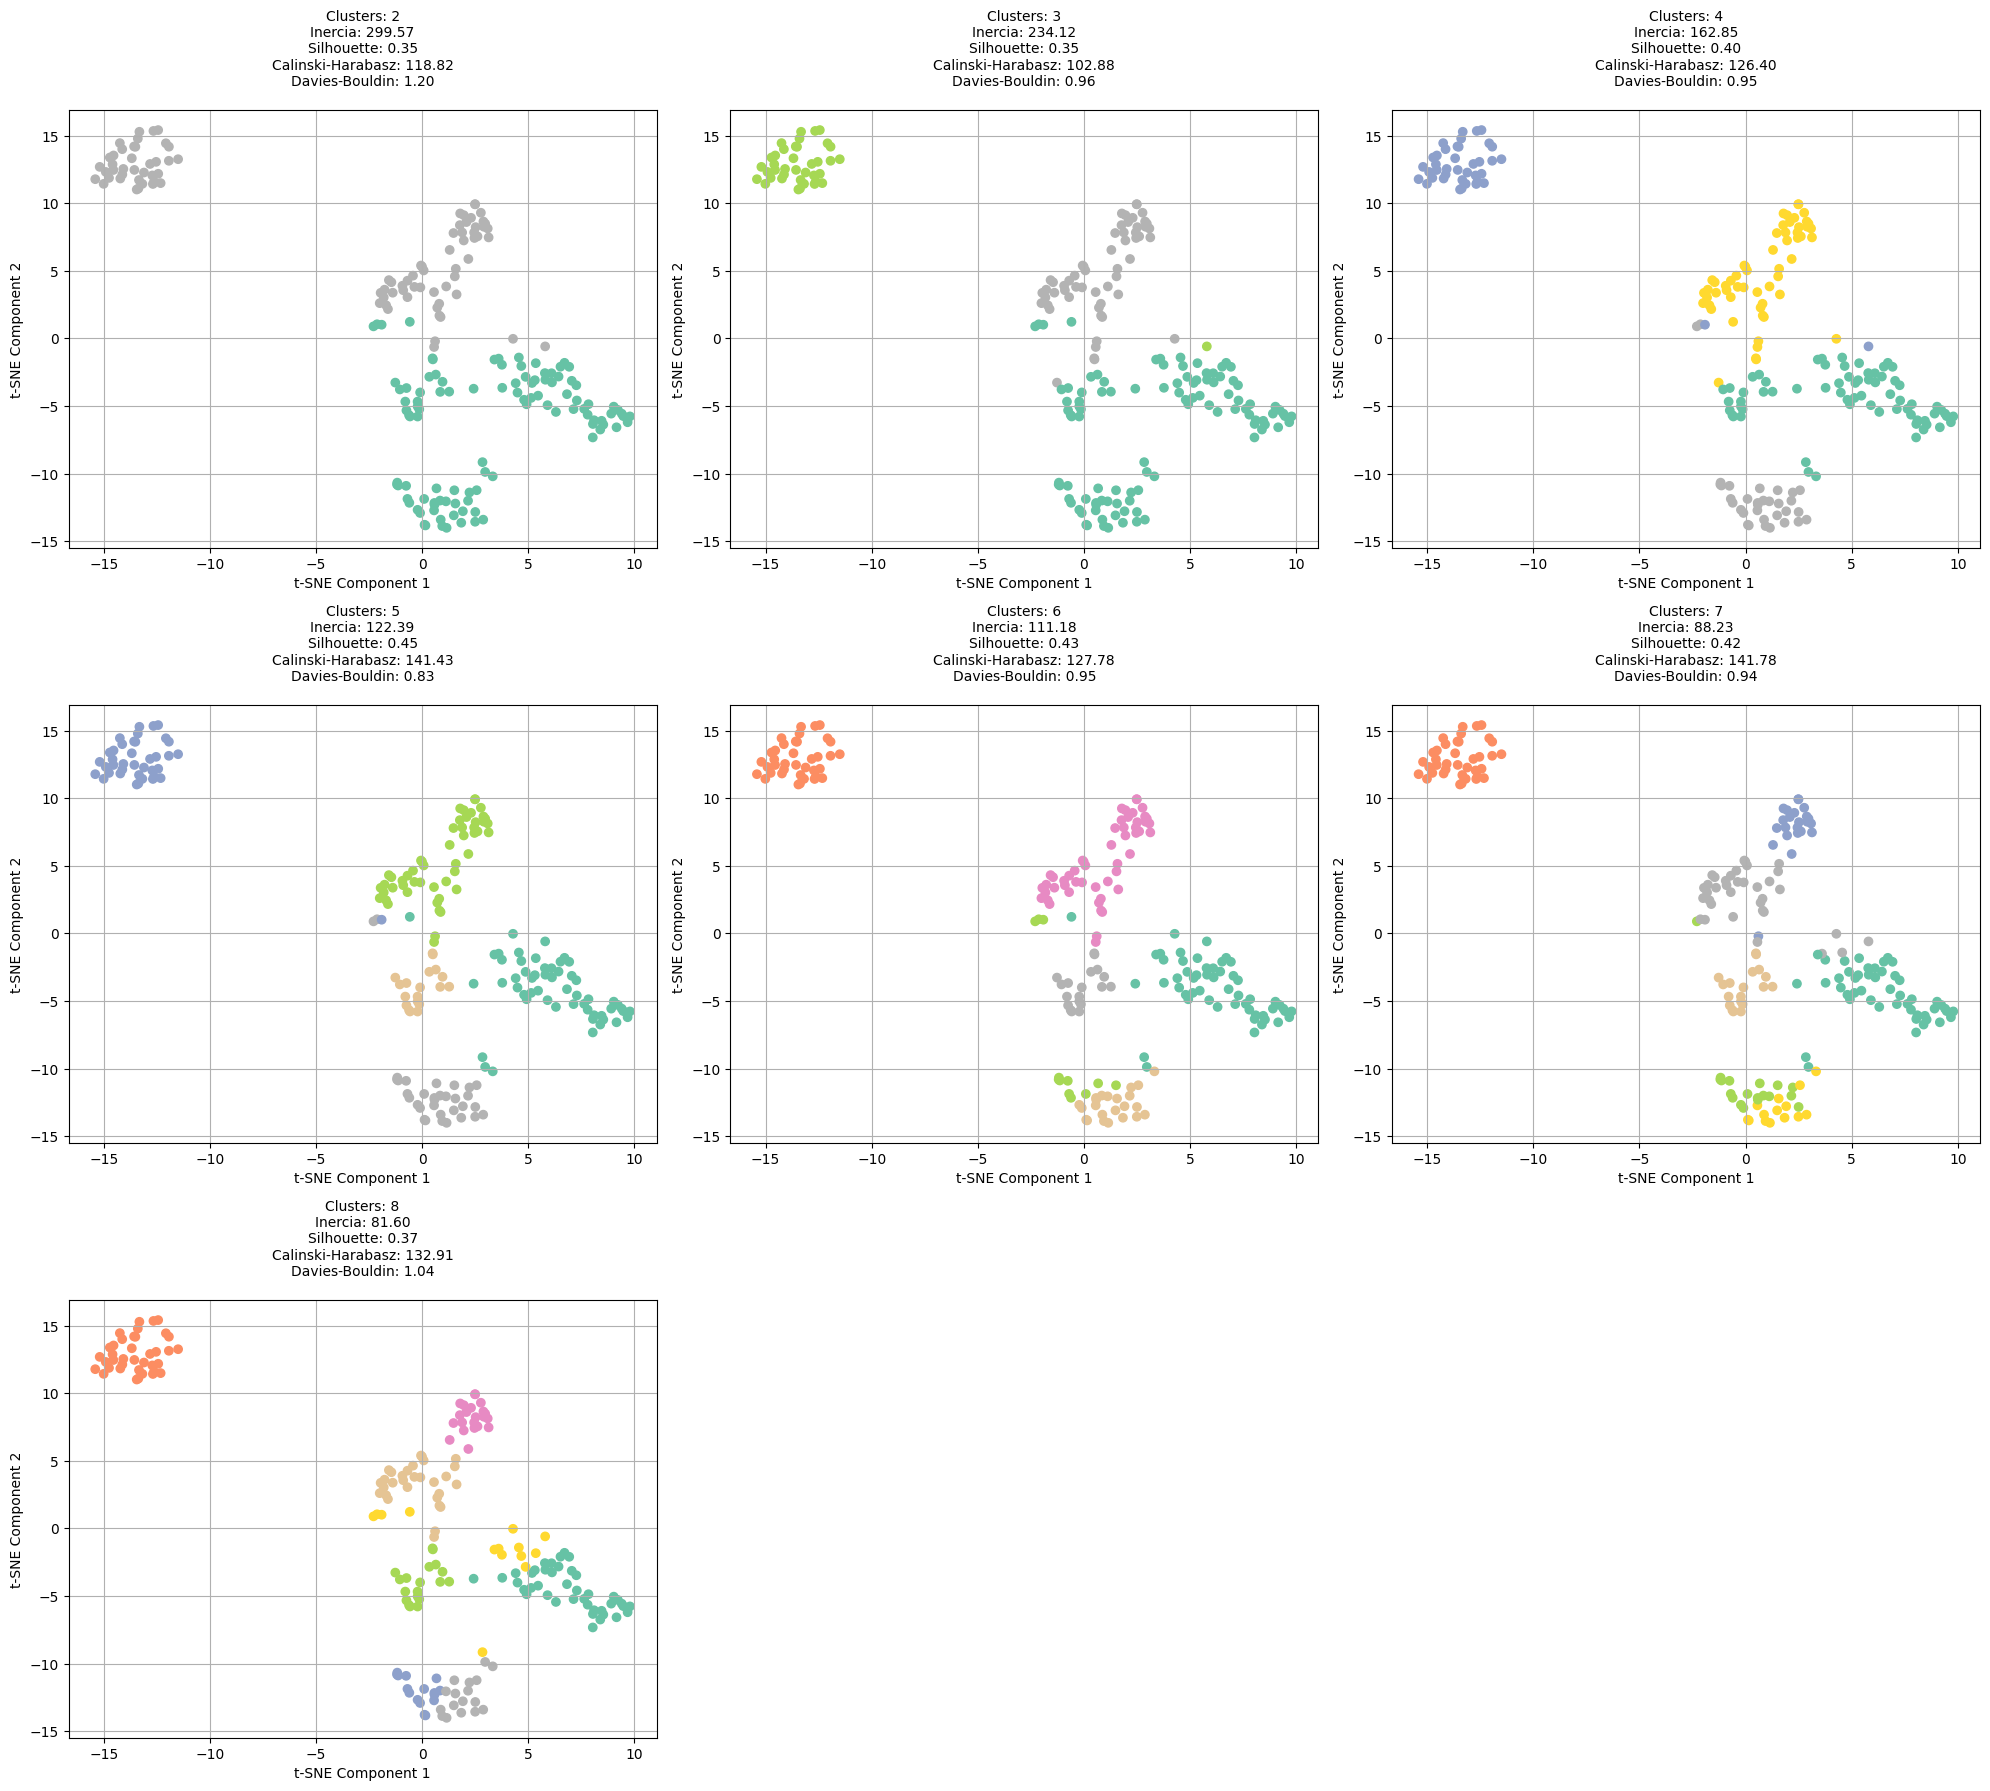

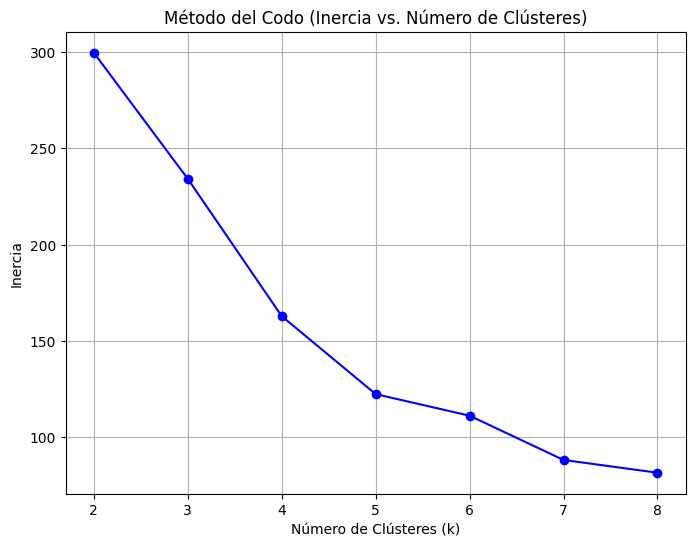

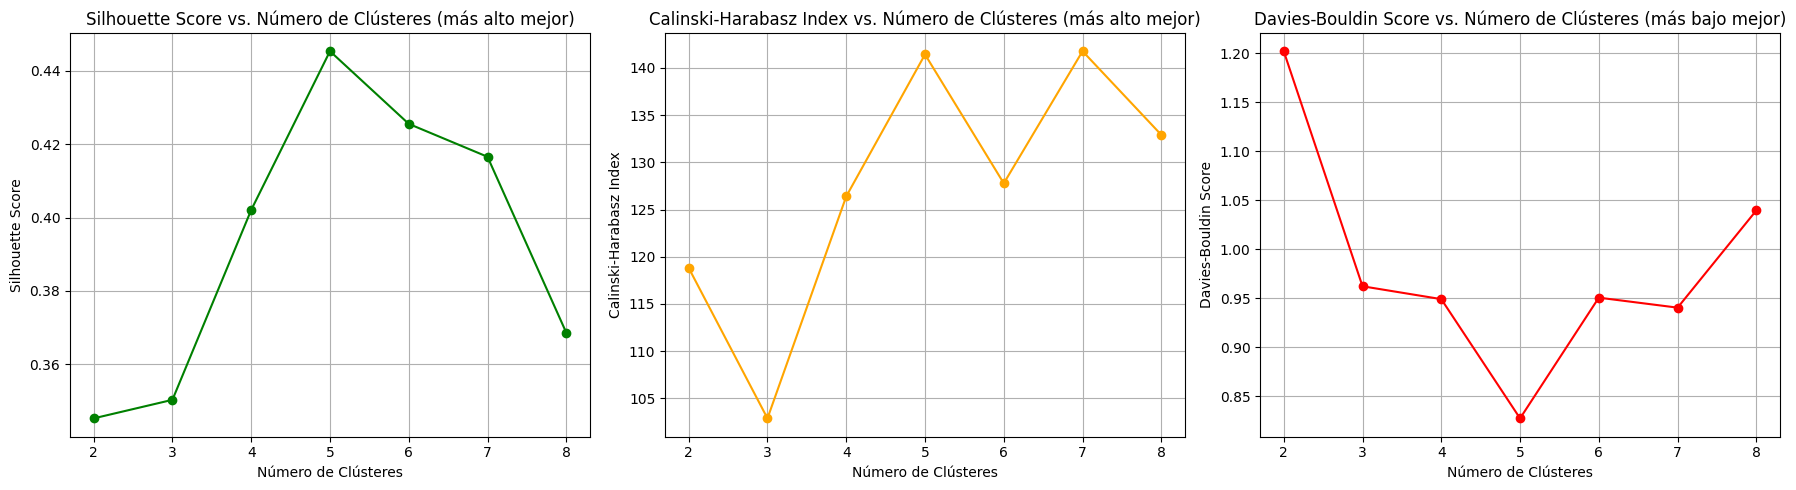

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin     Inercia
0         2    0.345263         118.817779        1.202041  299.566254
1         3    0.350316         102.880900        0.962150  234.123138
2         4    0.402069         126.397946        0.949026  162.853210
3         5    0.445360         141.434474        0.827355  122.394447
4         6    0.425550         127.782269        0.950521  111.184052
5         7    0.416575         141.779200        0.940336   88.226105
6         8    0.368620         132.913082        1.039591   81.598061


In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Inicializar almacenamiento de métricas
metrics = {
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': [],
    'Inercia': []
}

# Función para calcular y registrar métricas
def calculate_metrics(method_name, n_clusters, labels, X_scaled, inertia=None):
    metrics['Clusters'].append(n_clusters)
    metrics['Silhouette'].append(silhouette_score(X_scaled, labels))
    metrics['Calinski-Harabasz'].append(calinski_harabasz_score(X_scaled, labels))
    metrics['Davies-Bouldin'].append(davies_bouldin_score(X_scaled, labels))
    if inertia is not None:
        metrics['Inercia'].append(inertia)

# Configurar la figura para el grid de subplots con 3 filas y 3 columnas
fig, axes = plt.subplots(3, 3, figsize=(20, 18))  # 3 filas y 3 columnas
axes = axes.flatten()

# Método del codo
inertia = []

# Probar para k=2 a k=8
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_scaled)

    # Calcular métricas
    calculate_metrics('K-Means', k, kmeans_labels, X_scaled, kmeans.inertia_)

    # Aplicar t-SNE para reducción de dimensiones (de 3D a 2D)
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Gráfico de clústeres usando t-SNE
    ax = axes[k - 2]
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='Set2')

    # Etiquetas de los ejes
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')

    # Añadir las métricas como texto sobre cada subplot con espacio vertical
    ax.text(0.5, 1.05, f'Clusters: {k}\nInercia: {kmeans.inertia_:.2f}\nSilhouette: {metrics["Silhouette"][-1]:.2f}\n'
                       f'Calinski-Harabasz: {metrics["Calinski-Harabasz"][-1]:.2f}\nDavies-Bouldin: {metrics["Davies-Bouldin"][-1]:.2f}',
            ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    ax.grid(True)
    # Calcular inercia para el codo
    inertia.append(kmeans.inertia_)

# Desactivar los gráficos vacíos si hay menos de 9 subgráficos
for i in range(k - 1, len(axes)):
    axes[i].axis('off')  # Apagar los ejes no utilizados

# Ajustar diseño para que todo se vea bien
plt.tight_layout()

# Gráfico del método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(2, 9), inertia, marker='o', color='blue')
plt.title('Método del Codo (Inercia vs. Número de Clústeres)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Gráficas de métrica de validación
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(2, 9), metrics['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Número de Clústeres (más alto mejor)')
axes[0].set_xlabel('Número de Clústeres')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(2, 9), metrics['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Número de Clústeres (más alto mejor)')
axes[1].set_xlabel('Número de Clústeres')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(2, 9), metrics['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Número de Clústeres (más bajo mejor)')
axes[2].set_xlabel('Número de Clústeres')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.445360 con k=5 clusters.
* Calinski-Harabasz: 141.434474 con k=5 clusters.
* Davies-Bouldin: 0.827355 con k=5 clusters.

El método del codo sugiere que el número óptimo de clusters es 5.

### Agglomerative Clustering

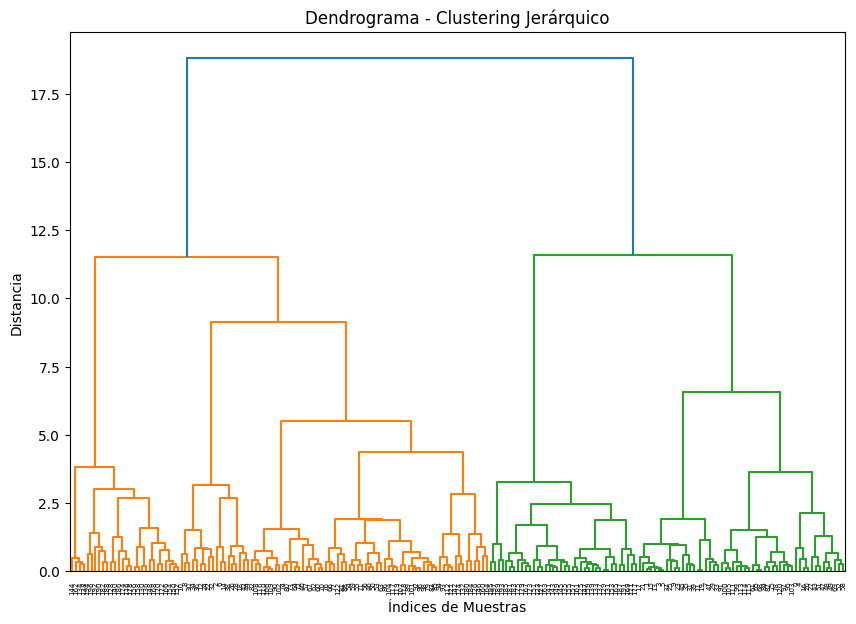

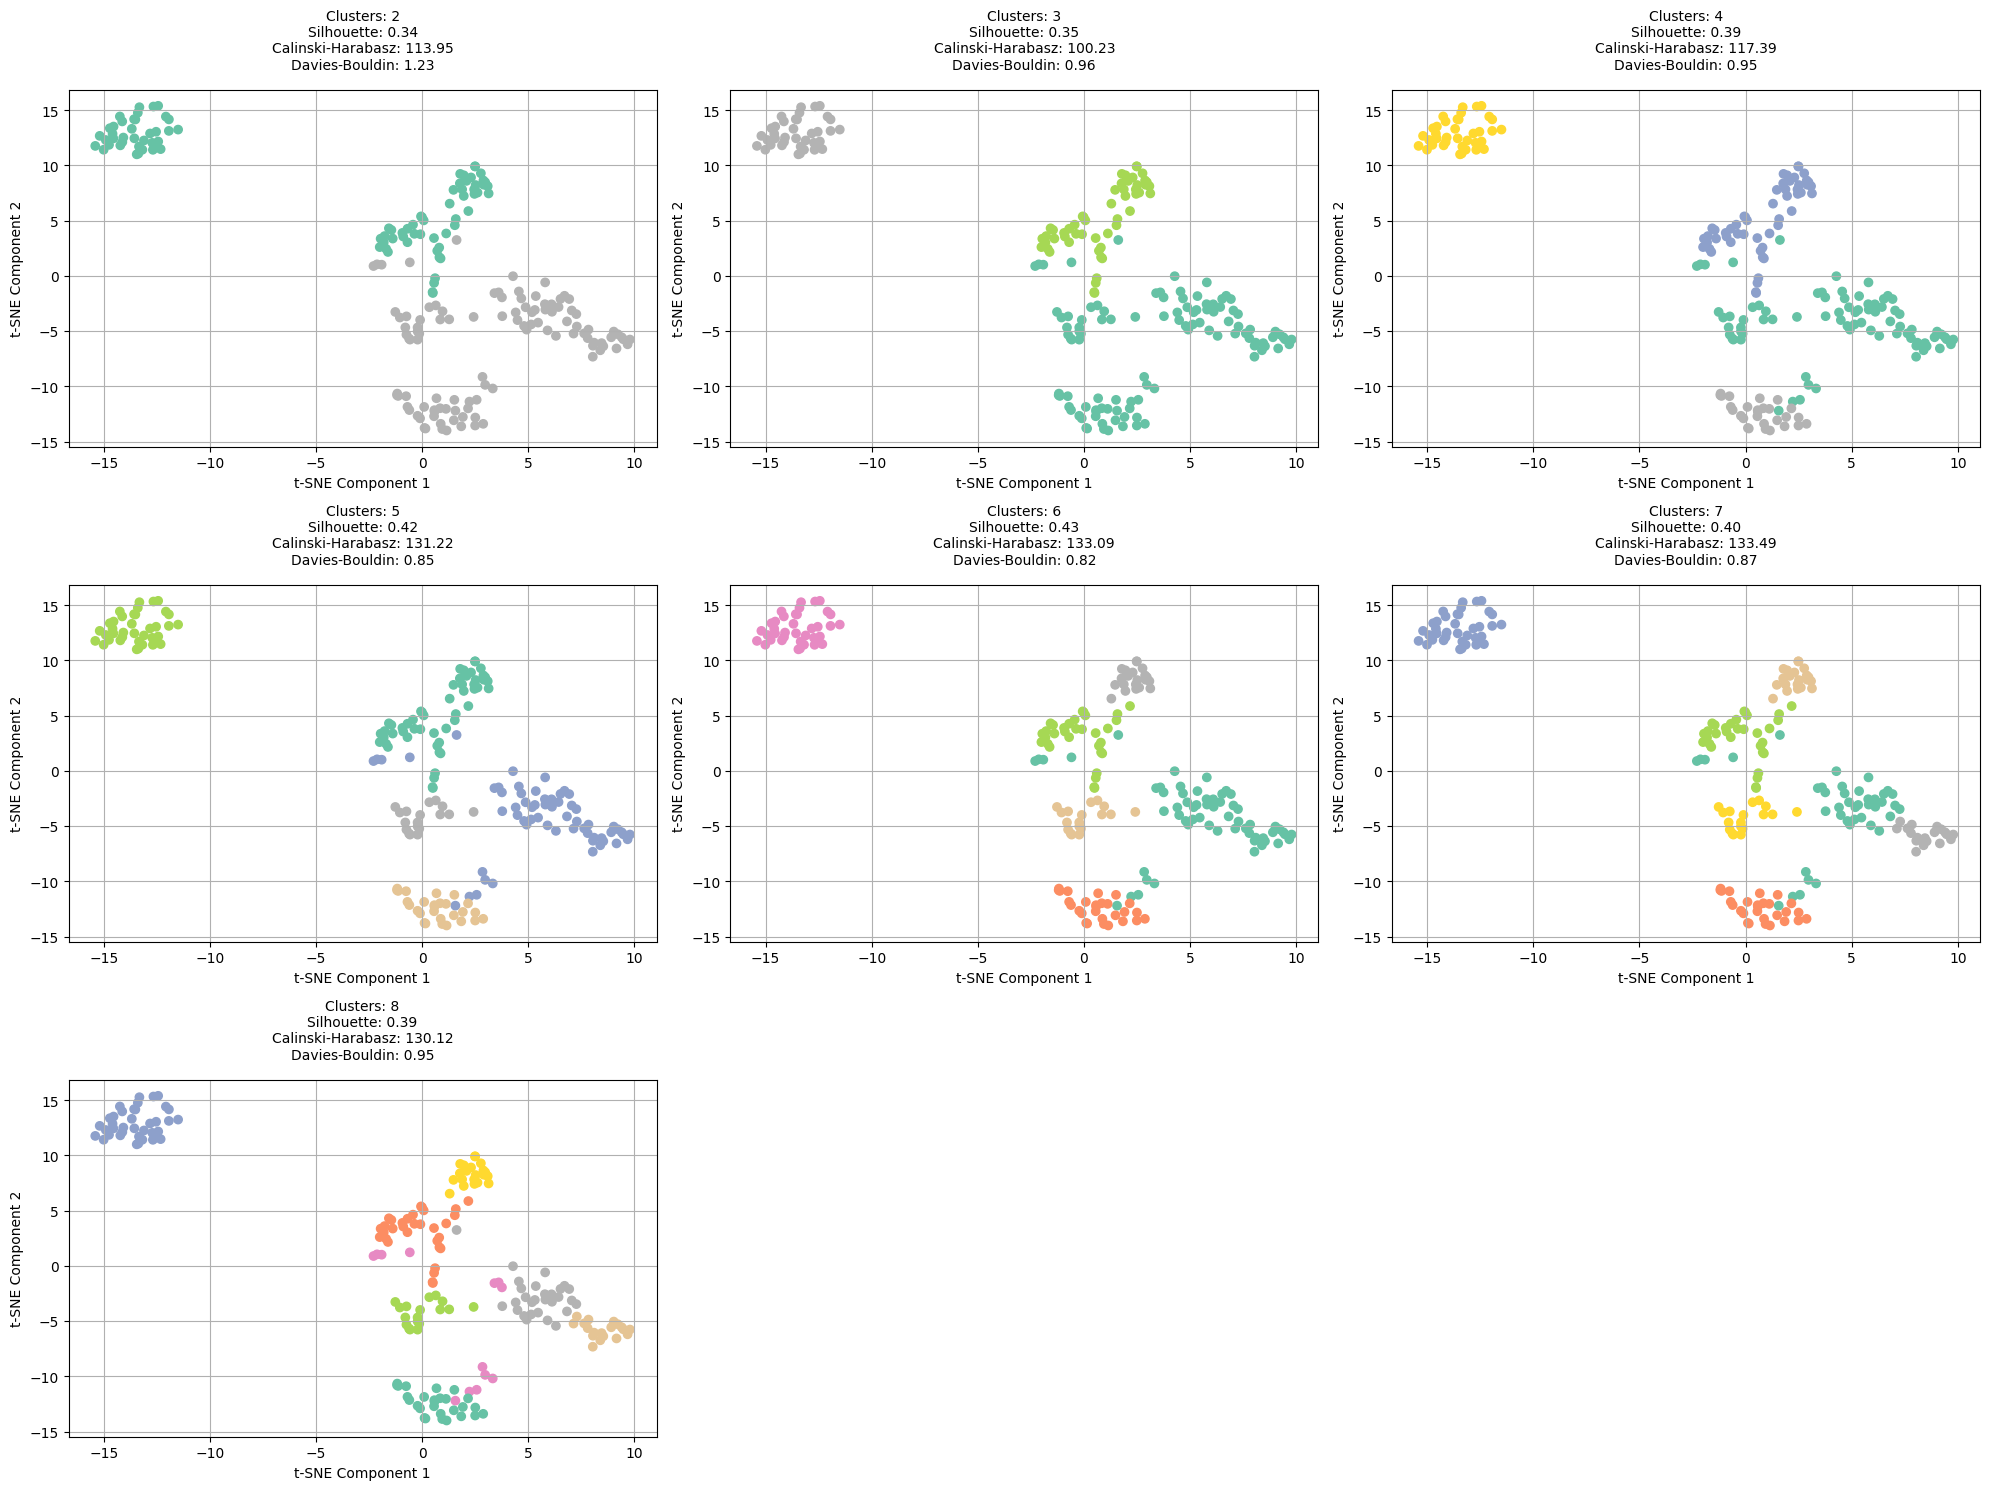

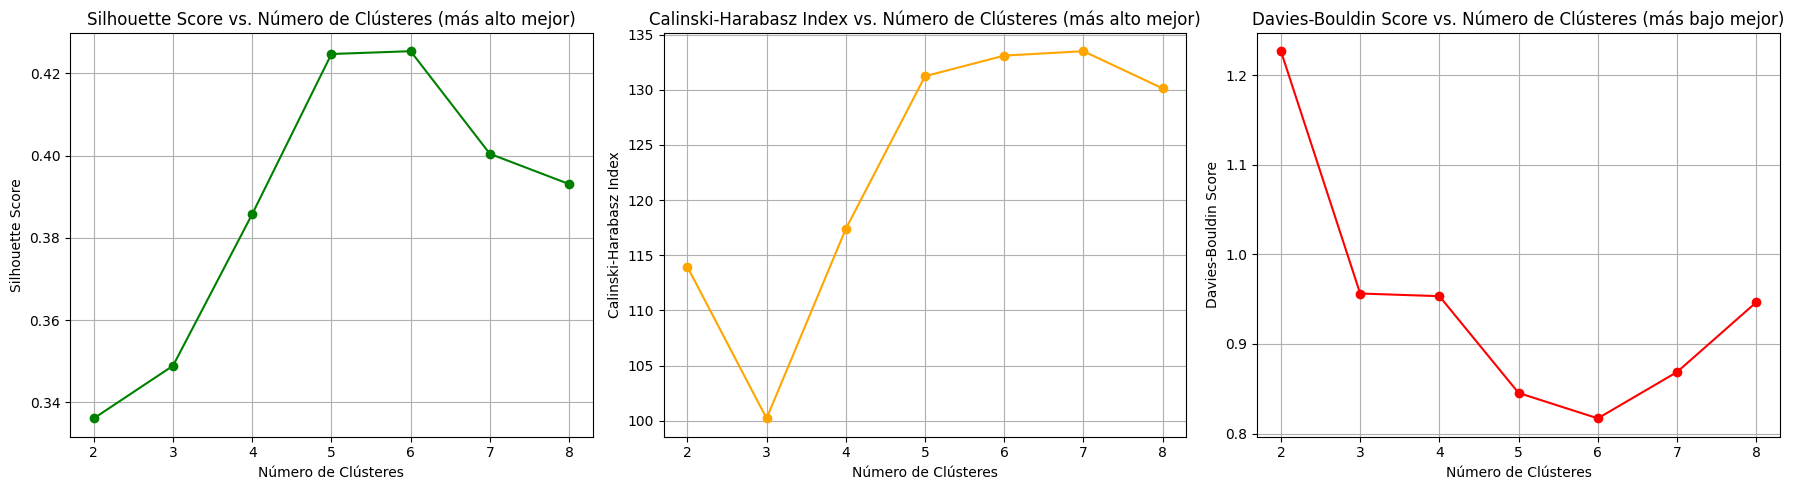

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         2    0.336127         113.954368        1.226695
1         3    0.348910         100.227388        0.956265
2         4    0.385783         117.394717        0.953289
3         5    0.424708         131.222855        0.845290
4         6    0.425392         133.092029        0.816922
5         7    0.400440         133.492336        0.868612
6         8    0.393094         130.118281        0.946442


In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar métricas
metrics = {
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Dendrograma
linked = linkage(X_scaled, 'ward')

# Graficar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma - Clustering Jerárquico')
plt.xlabel('Índices de Muestras')
plt.ylabel('Distancia')
plt.show()

# Realizar clustering jerárquico para cada k
fig, axes = plt.subplots(3, 3, figsize=(20, 15))  # 3 filas y 3 columnas
axes = axes.flatten()

for k in range(2, 9):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_scaled)

    # Calcular métricas
    silhouette = silhouette_score(X_scaled, hierarchical_labels)
    calinski = calinski_harabasz_score(X_scaled, hierarchical_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, hierarchical_labels)

    metrics['Clusters'].append(k)
    metrics['Silhouette'].append(silhouette)
    metrics['Calinski-Harabasz'].append(calinski)
    metrics['Davies-Bouldin'].append(davies_bouldin)

    # Aplicar t-SNE para reducción de dimensiones (de 3D a 2D)
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Visualizar los clústeres en 2D utilizando t-SNE
    ax = axes[k - 2]
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=hierarchical_labels, cmap='Set2')

    # Añadir las métricas como texto sobre cada subplot con espacio vertical
    ax.text(0.5, 1.05, f'Clusters: {k}\nSilhouette: {silhouette:.2f}\nCalinski-Harabasz: {calinski:.2f}\nDavies-Bouldin: {davies_bouldin:.2f}',
            ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    # Etiquetas de los ejes
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')

    ax.grid(True)

# Desactivar los gráficos vacíos si hay menos de 9 subgráficos
for i in range(k - 1, len(axes)):
    axes[i].axis('off')  # Apagar los ejes no utilizados

# Ajustar diseño para que todo se vea bien
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

# Gráficas de las métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(2, 9), metrics['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Número de Clústeres (más alto mejor)')
axes[0].set_xlabel('Número de Clústeres')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(2, 9), metrics['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Número de Clústeres (más alto mejor)')
axes[1].set_xlabel('Número de Clústeres')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(2, 9), metrics['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Número de Clústeres (más bajo mejor)')
axes[2].set_xlabel('Número de Clústeres')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.425392 con k=6 clusters.
* Calinski-Harabasz: 133.092029 con k=6 clusters.
* Davies-Bouldin: 0.816922 con k=6 clusters.

Parecen haber alrededor de 6 a 8 segmentos principales de clientes en función de la estructura del dendrograma.

### Gaussian Mixture Model (GMM)

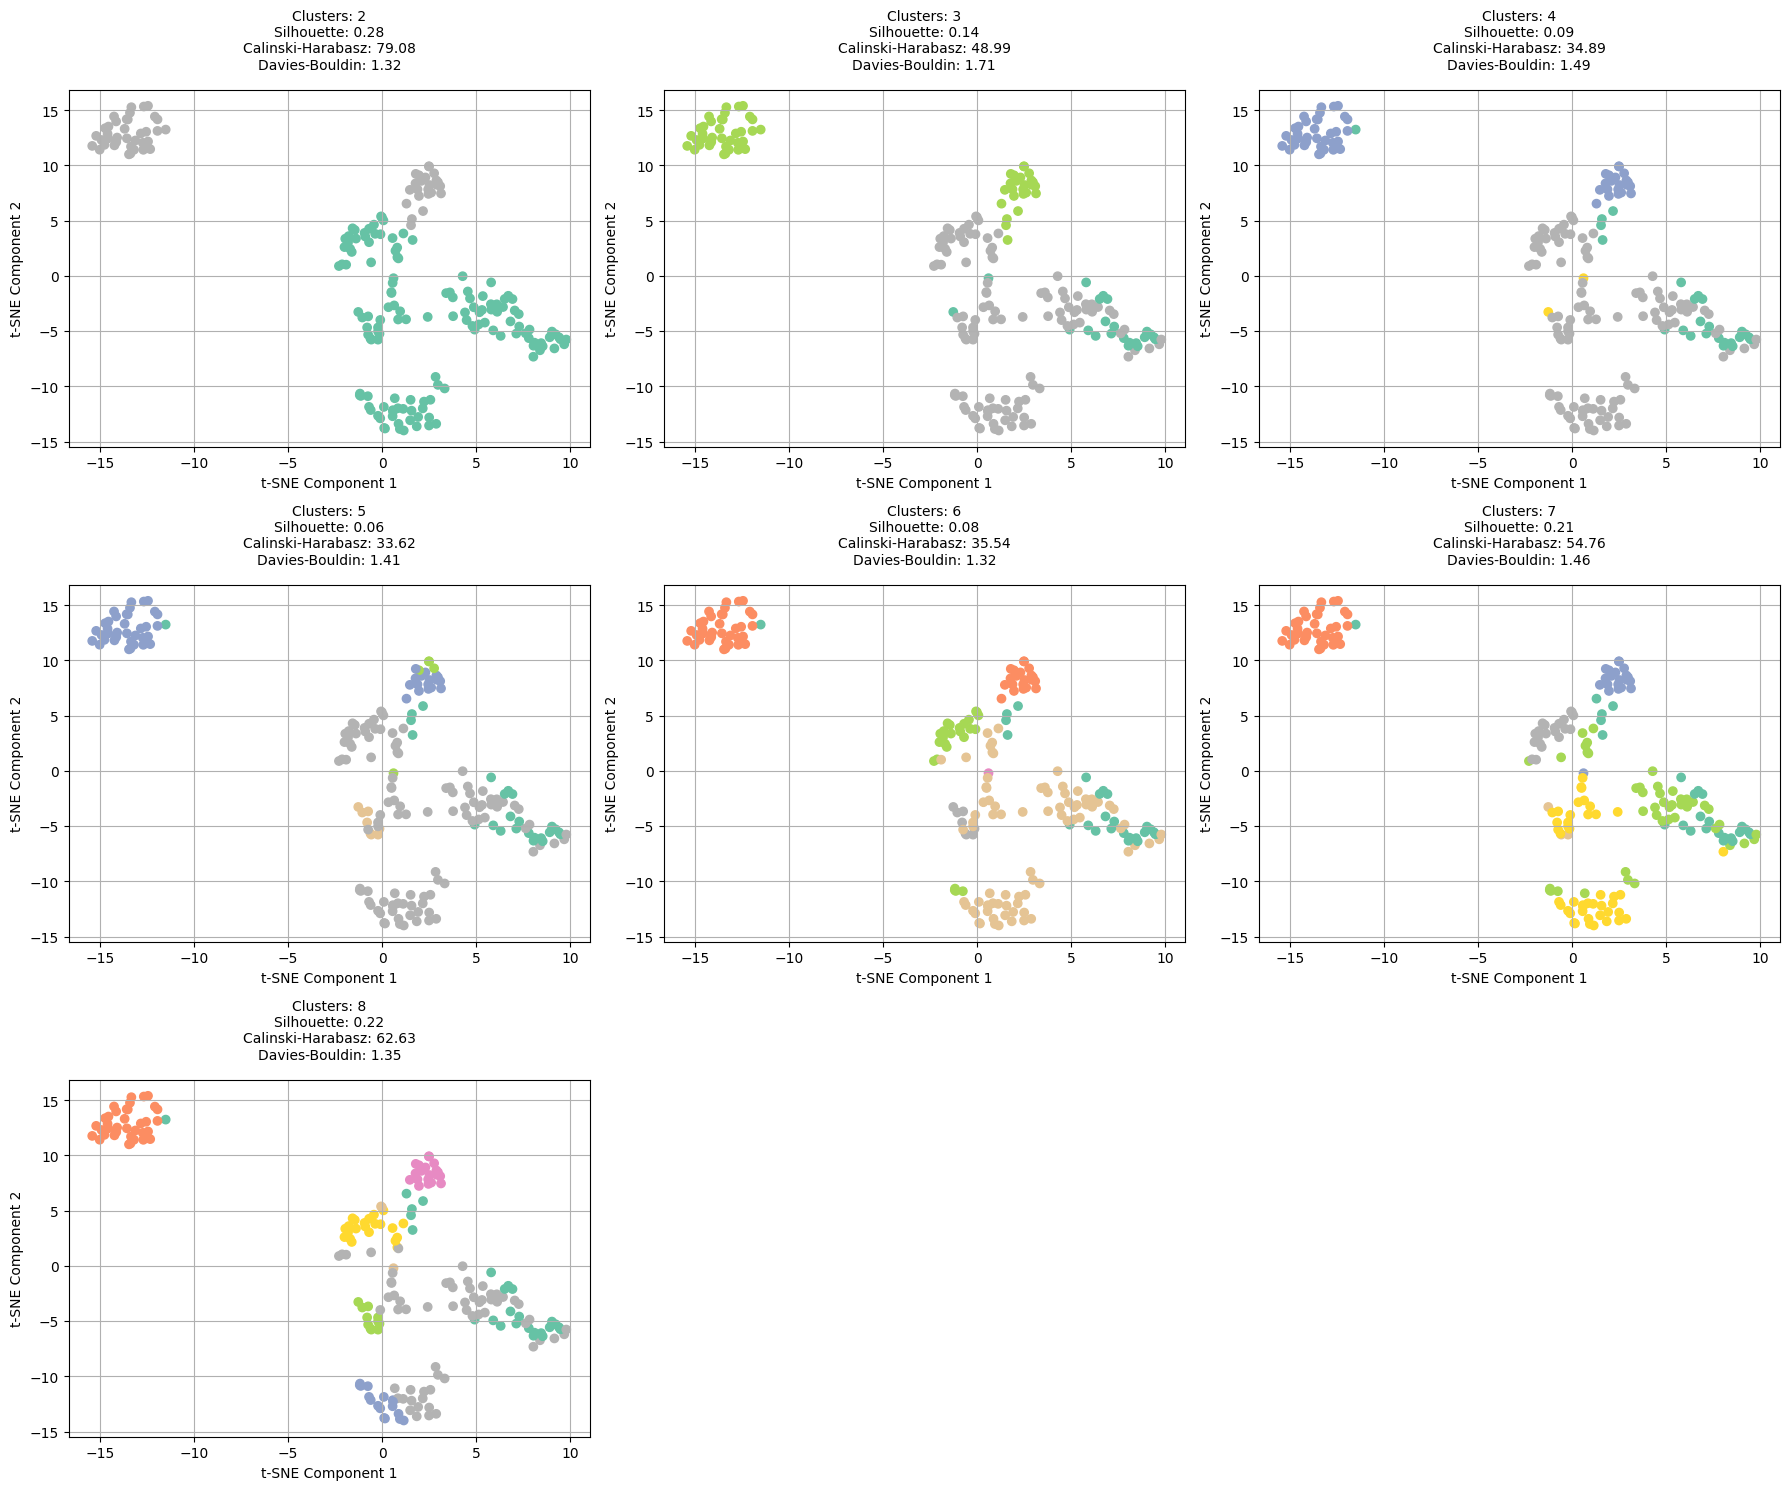

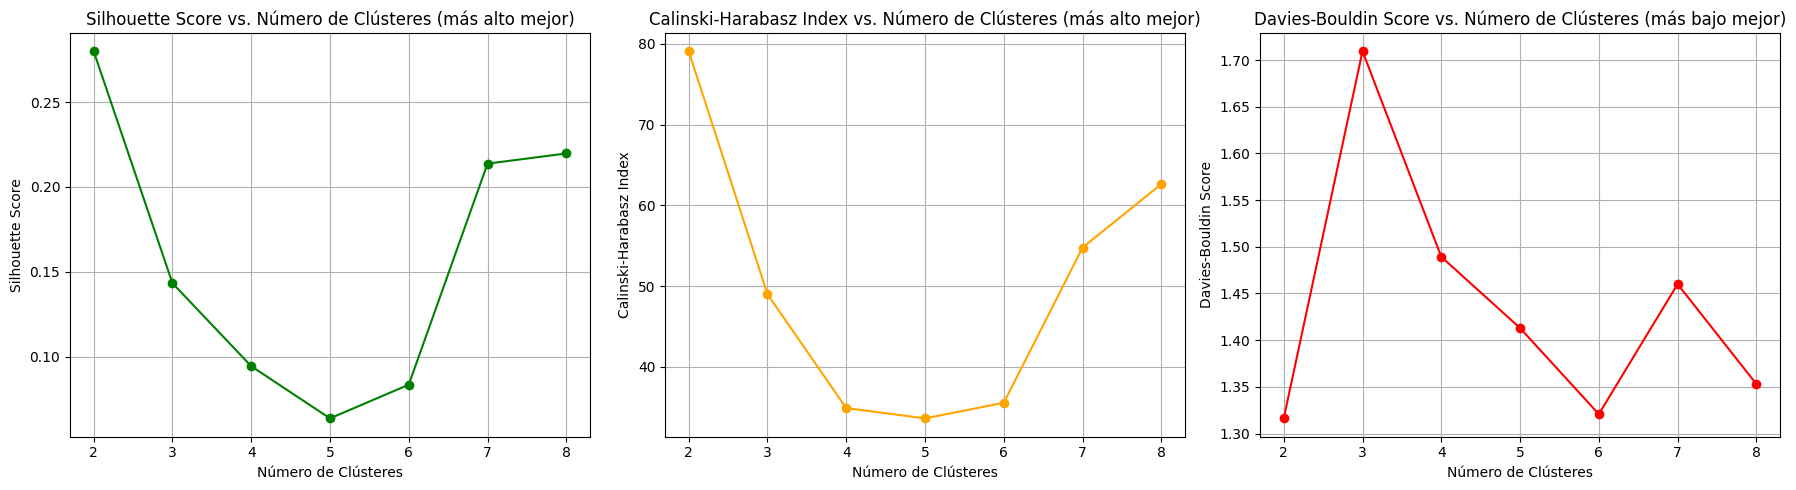

   Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0         2    0.279981          79.084718        1.316289
1         3    0.143324          48.989107        1.709465
2         4    0.094420          34.888145        1.489289
3         5    0.063660          33.615319        1.413002
4         6    0.083484          35.542873        1.320799
5         7    0.213722          54.762123        1.460061
6         8    0.219733          62.634740        1.353064


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar almacenamiento de métricas
metrics = {
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Realizar clustering con GMM para cada k
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for k in range(2, 9):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels = gmm.fit_predict(X_scaled)

    # Calcular métricas
    silhouette = silhouette_score(X_scaled, gmm_labels)
    calinski = calinski_harabasz_score(X_scaled, gmm_labels)
    davies_bouldin = davies_bouldin_score(X_scaled, gmm_labels)

    metrics['Clusters'].append(k)
    metrics['Silhouette'].append(silhouette)
    metrics['Calinski-Harabasz'].append(calinski)
    metrics['Davies-Bouldin'].append(davies_bouldin)

    # Aplicar t-SNE para reducción de dimensiones (de 3D a 2D)
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Visualizar los clústeres en 2D utilizando t-SNE
    ax = axes[k - 2]
    ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=gmm_labels, cmap='Set2')

    # Etiquetas de los ejes
    ax.set_xlabel('t-SNE Component 1')
    ax.set_ylabel('t-SNE Component 2')

    # Añadir las métricas como texto sobre cada subplot
    ax.text(0.5, 1.05, f'Clusters: {k}\nSilhouette: {silhouette:.2f}\nCalinski-Harabasz: {calinski:.2f}\nDavies-Bouldin: {davies_bouldin:.2f}',
            ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    ax.grid(True)

# Desactivar los gráficos vacíos si hay menos de 9 subgráficos
for i in range(k - 1, len(axes)):
    axes[i].axis('off')  # Apagar los ejes no utilizados

# Ajustar diseño para que todo se vea bien
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

# Gráficas de las métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(2, 9), metrics['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Número de Clústeres (más alto mejor)')
axes[0].set_xlabel('Número de Clústeres')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(2, 9), metrics['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Número de Clústeres (más alto mejor)')
axes[1].set_xlabel('Número de Clústeres')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(2, 9), metrics['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Número de Clústeres (más bajo mejor)')
axes[2].set_xlabel('Número de Clústeres')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.279981 con k=2 clusters.
* Calinski-Harabasz: 79.084718 con k=2 clusters.
* Davies-Bouldin: 1.316289 con k=2 clusters.

### DBSCAN

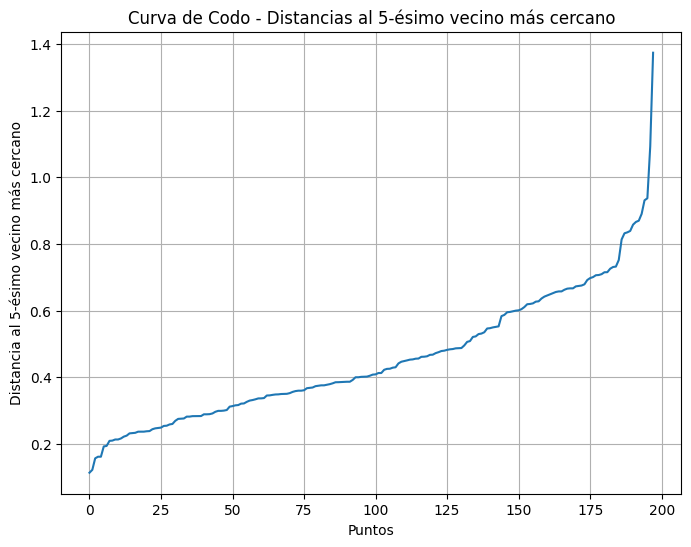

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder, StandardScaler


# Inicializamos el modelo de vecinos más cercanos
k = 5  # Suele elegirse k=4 o 5 dependiendo de los datos

# Ajustamos el modelo y calculamos las distancias
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X_scaled)  # Usamos los datos escalados
distances, indices = neighbors_fit.kneighbors(X_scaled)

# Ordenamos las distancias por cada punto
distances = np.sort(distances[:, k-1], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title(f"Curva de Codo - Distancias al {k}-ésimo vecino más cercano")
plt.xlabel('Puntos')
plt.ylabel(f'Distancia al {k}-ésimo vecino más cercano')
plt.grid(True)
plt.show()



El método de k-distancias sugiere que el número óptimo de eps puede estar en 0.7.

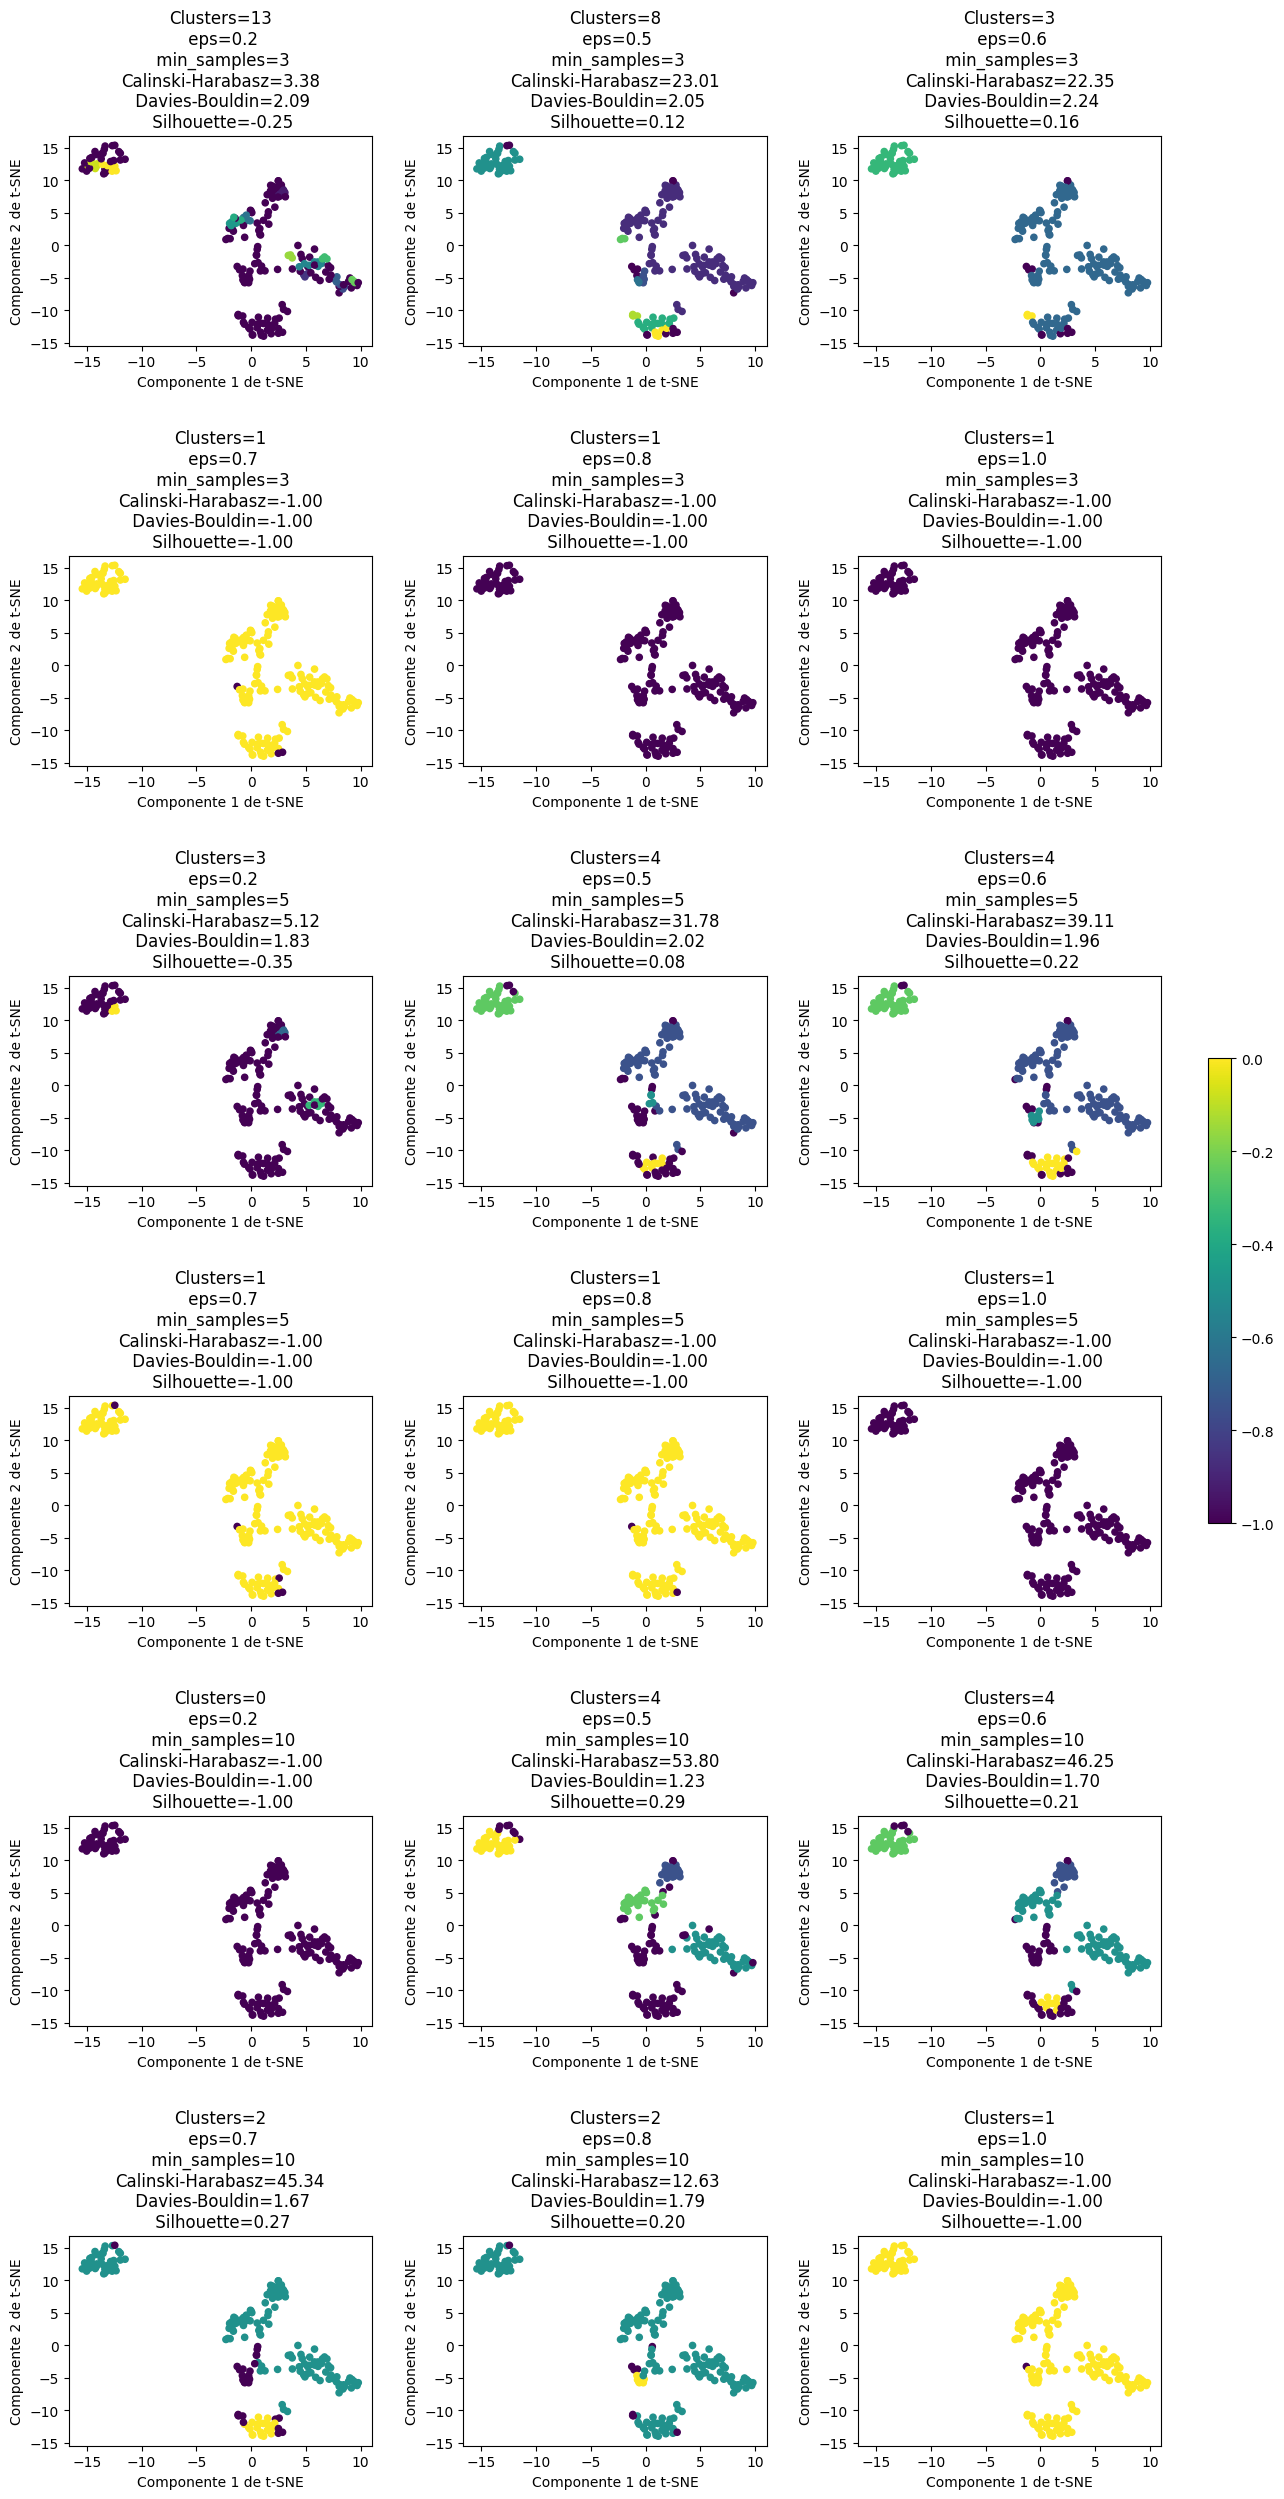

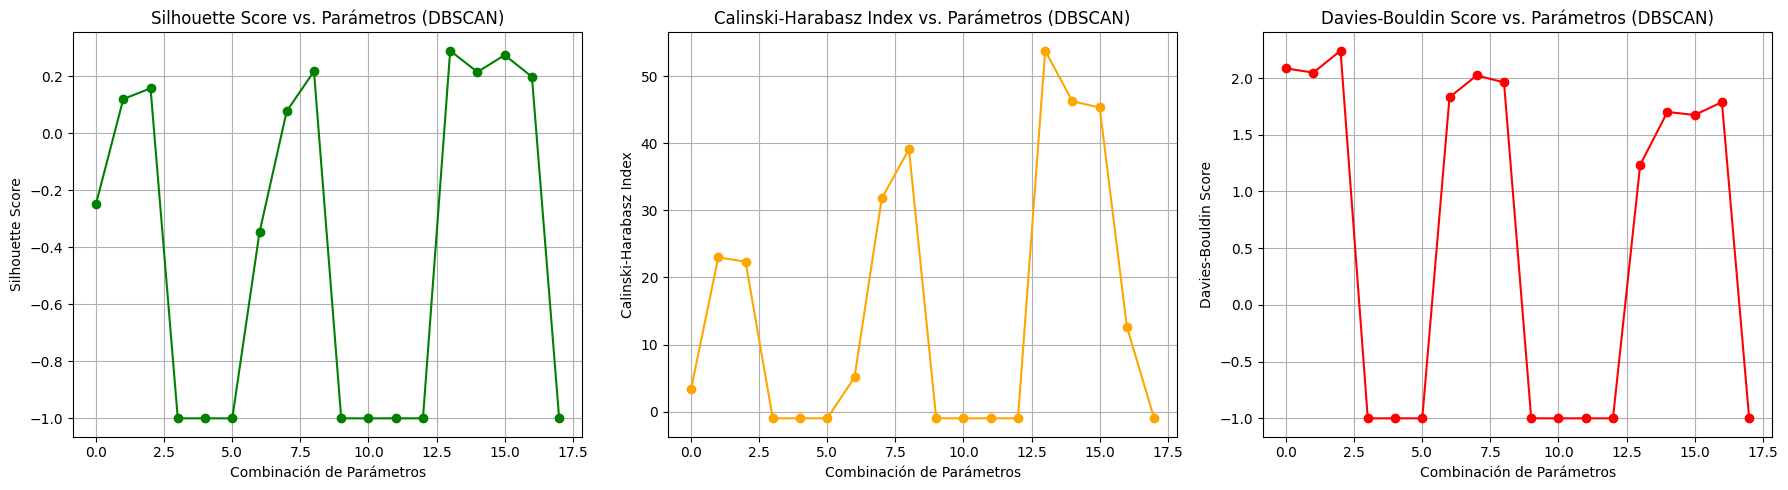

    Eps  Min_Samples  Clusters  Silhouette  Calinski-Harabasz  Davies-Bouldin
0   0.2            3        13   -0.247055           3.375962        2.085244
1   0.5            3         8    0.120178          23.005925        2.047622
2   0.6            3         3    0.157807          22.346669        2.241010
3   0.7            3         1   -1.000000          -1.000000       -1.000000
4   0.8            3         1   -1.000000          -1.000000       -1.000000
5   1.0            3         1   -1.000000          -1.000000       -1.000000
6   0.2            5         3   -0.347479           5.120283        1.830757
7   0.5            5         4    0.077638          31.776209        2.023227
8   0.6            5         4    0.217409          39.114526        1.961860
9   0.7            5         1   -1.000000          -1.000000       -1.000000
10  0.8            5         1   -1.000000          -1.000000       -1.000000
11  1.0            5         1   -1.000000          -1.000000   

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Valores de los parámetros de DBSCAN
eps_values = [0.2, 0.5, 0.6, 0.7, 0.8, 1.0]  # Diferentes valores de epsilon (radio de vecindad)
min_samples_values = [3, 5, 10]  # Diferentes valores de min_samples

# Inicializar almacenamiento de métricas
metrics_dbscan = {
    'Eps': [],
    'Min_Samples': [],
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Número de columnas para los subgráficos (3 gráficos por fila)
n_cols = 3

# Calcular el número de filas necesarias
n_rows = (len(eps_values) * len(min_samples_values)) // n_cols + ((len(eps_values) * len(min_samples_values)) % n_cols != 0)

# Crear un grid de subgráficos
fig = plt.figure(figsize=(15, 5 * n_rows))  # Ajustar la altura de la figura para acomodar los 5x5 por gráfico

# Iterar sobre las combinaciones de eps y min_samples para llenar el grid de subgráficos
for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        # Aplicar DBSCAN con los parámetros actuales
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Filtrar los puntos de ruido (-1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Eliminar ruido (-1) de la cuenta de clusters

        # Cálculo de las métricas de clustering si hay más de un cluster
        if n_clusters > 1:
            ch_score = calinski_harabasz_score(X_scaled, labels)  # Calinski-Harabasz
            db_score = davies_bouldin_score(X_scaled, labels)  # Davies-Bouldin
            try:
                silhouette_avg = silhouette_score(X_scaled, labels)  # Silhouette
            except ValueError:  # Puede fallar si solo hay un cluster
                silhouette_avg = -1
        else:
            ch_score = -1
            db_score = -1
            silhouette_avg = -1

        # Almacenar métricas
        metrics_dbscan['Eps'].append(eps)
        metrics_dbscan['Min_Samples'].append(min_samples)
        metrics_dbscan['Clusters'].append(n_clusters)
        metrics_dbscan['Silhouette'].append(silhouette_avg)
        metrics_dbscan['Calinski-Harabasz'].append(ch_score)
        metrics_dbscan['Davies-Bouldin'].append(db_score)

        # Aplicar t-SNE para reducción de dimensionalidad
        tsne = TSNE(n_components=2, random_state=42)
        X_tsne = tsne.fit_transform(X_scaled)

        # Crear un subgráfico 2D con los resultados de t-SNE
        ax = fig.add_subplot(n_rows, n_cols, i * len(eps_values) + j + 1)

        # Graficar los resultados de t-SNE
        scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=20)

        # Título y etiquetas, ahora con el número de clusters
        ax.set_title(f"Clusters={n_clusters}\n eps={eps}\n min_samples={min_samples}\n"
                     f"Calinski-Harabasz={ch_score:.2f}\n Davies-Bouldin={db_score:.2f}\n Silhouette={silhouette_avg:.2f}")
        ax.set_xlabel("Componente 1 de t-SNE")
        ax.set_ylabel("Componente 2 de t-SNE")

# Ajustar el espacio entre los subgráficos
plt.subplots_adjust(hspace=1.0, wspace=0.3)  # Aumenta el espacio vertical entre los subgráficos (hspace)

# Añadir barra de colores
fig.colorbar(scatter, ax=fig.get_axes(), orientation='vertical', fraction=0.02, pad=0.04)

# Mostrar el gráfico
plt.show()

# Gráficas de las métricas para DBSCAN
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(len(metrics_dbscan['Silhouette'])), metrics_dbscan['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Parámetros (DBSCAN)')
axes[0].set_xlabel('Combinación de Parámetros')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(len(metrics_dbscan['Calinski-Harabasz'])), metrics_dbscan['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Parámetros (DBSCAN)')
axes[1].set_xlabel('Combinación de Parámetros')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(len(metrics_dbscan['Davies-Bouldin'])), metrics_dbscan['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Parámetros (DBSCAN)')
axes[2].set_xlabel('Combinación de Parámetros')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_dbscan_df = pd.DataFrame(metrics_dbscan)
print(metrics_dbscan_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.289699 con eps=0.5, min_samples=10 y clusters=4.
* Calinski-Harabasz: 53.798595 con eps=0.5, min_samples=10 y clusters=4.
* Davies-Bouldin: 1.234629 con eps=0.5, min_samples=10 y clusters=4.

### Affinity Propagation

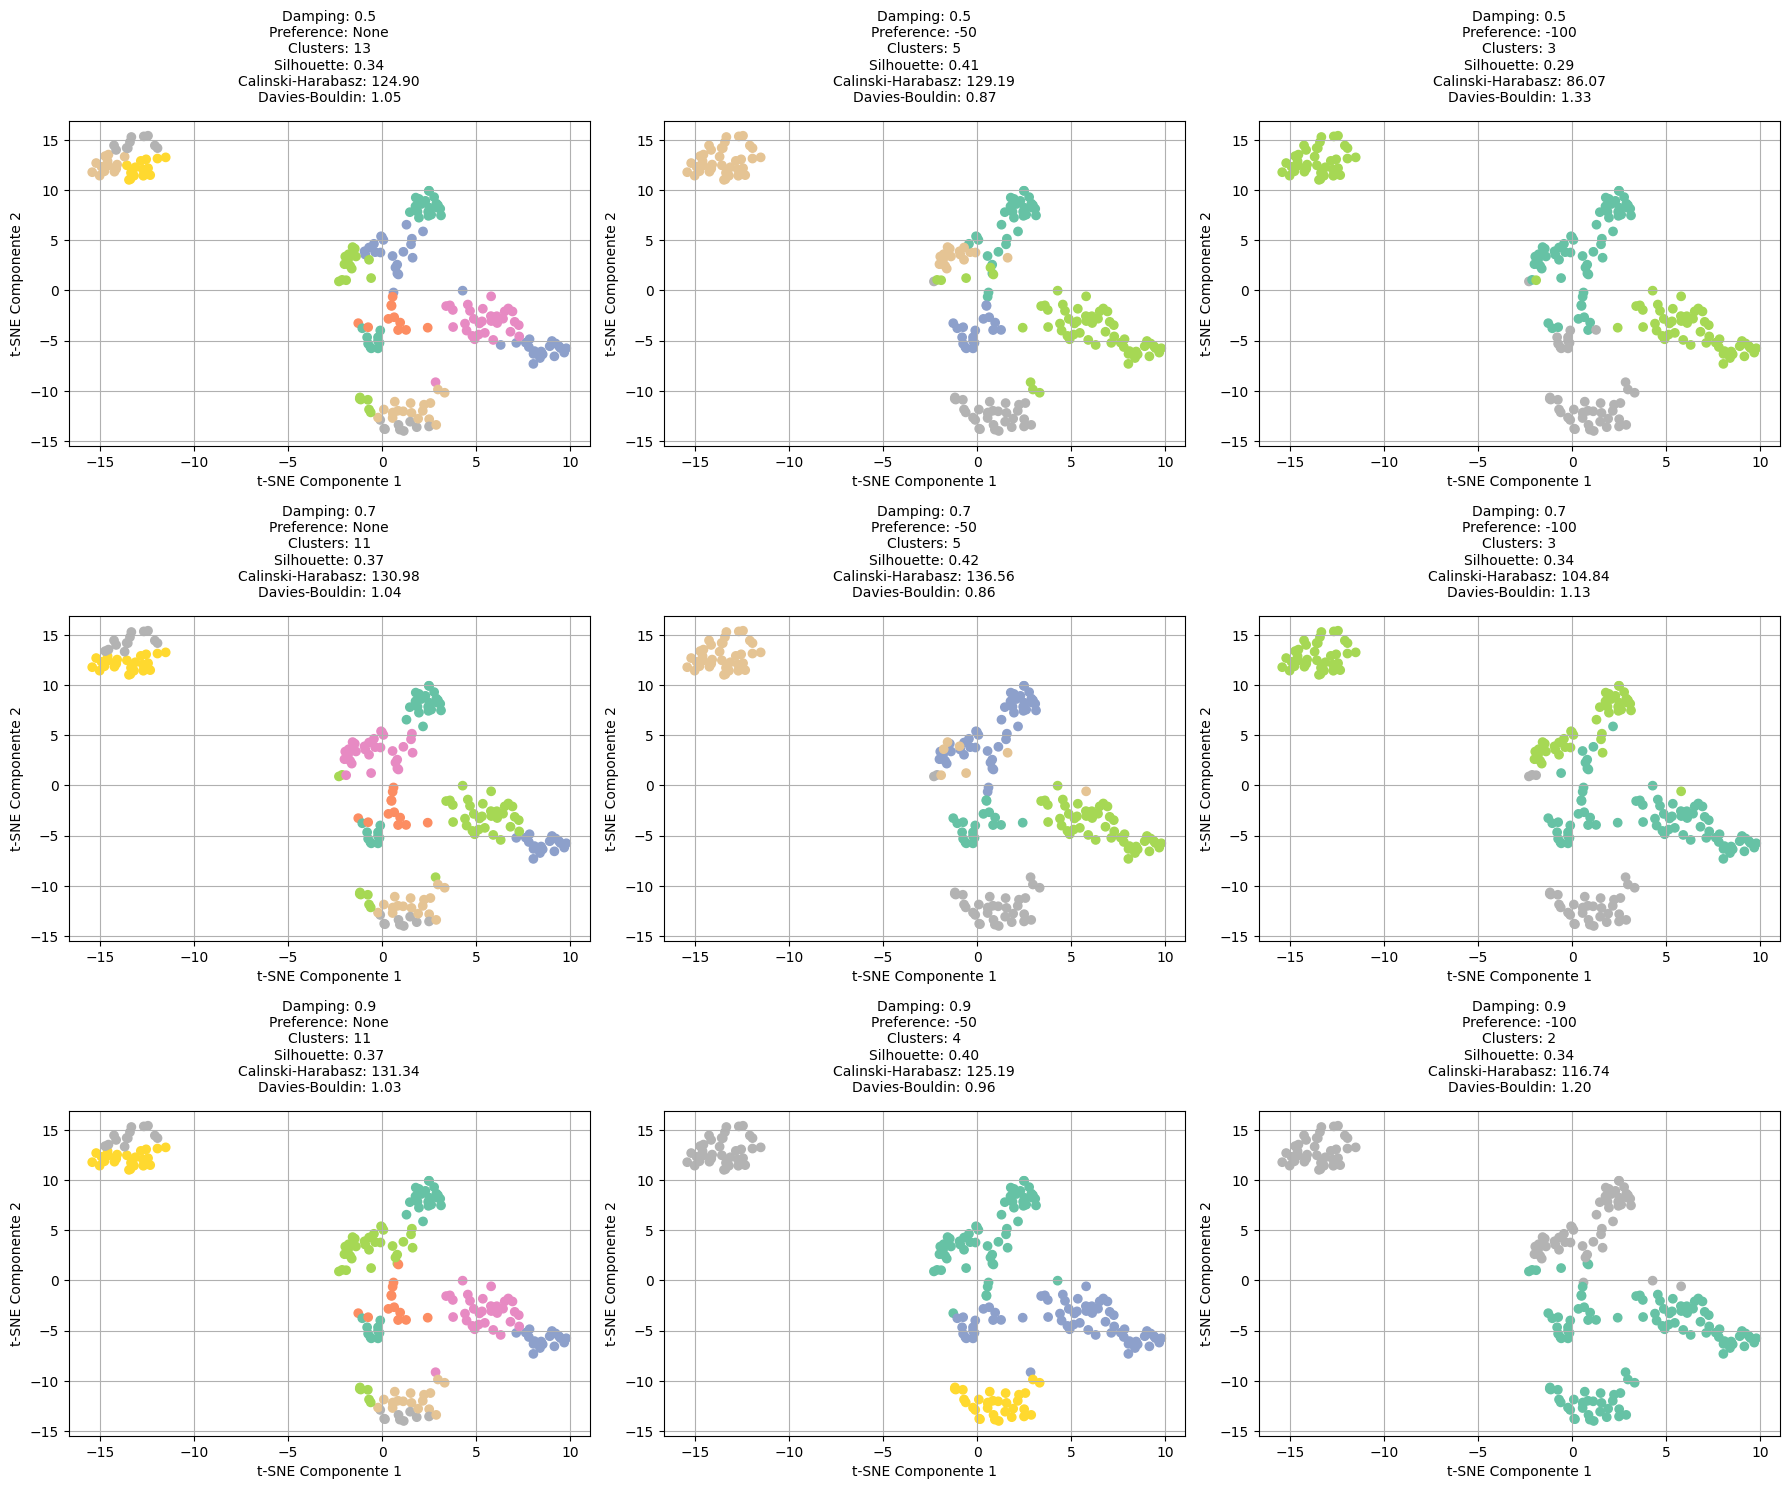

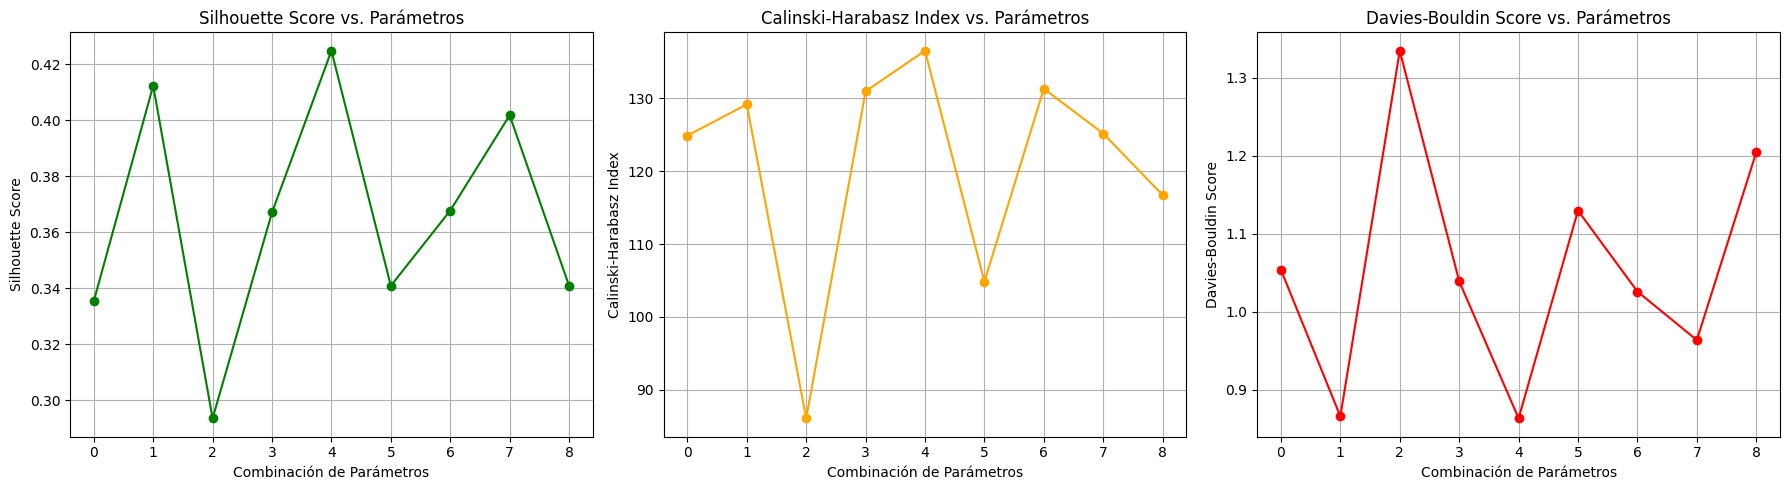

   Damping  Preference   Affinity  Clusters  Silhouette  Calinski-Harabasz  \
0      0.5         NaN  euclidean        13    0.335479         124.898865   
1      0.5       -50.0  euclidean         5    0.412427         129.190370   
2      0.5      -100.0  euclidean         3    0.293564          86.069876   
3      0.7         NaN  euclidean        11    0.367132         130.984726   
4      0.7       -50.0  euclidean         5    0.424915         136.562289   
5      0.7      -100.0  euclidean         3    0.340925         104.843038   
6      0.9         NaN  euclidean        11    0.367806         131.338520   
7      0.9       -50.0  euclidean         4    0.401855         125.191394   
8      0.9      -100.0  euclidean         2    0.340950         116.735288   

   Davies-Bouldin  
0        1.053613  
1        0.865574  
2        1.334749  
3        1.039013  
4        0.863096  
5        1.129599  
6        1.025798  
7        0.963506  
8        1.204345  


In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.manifold import TSNE  # Importar t-SNE
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Inicializar almacenamiento de métricas
metrics = {
    'Damping': [],
    'Preference': [],
    'Affinity': [],
    'Clusters': [],
    'Silhouette': [],
    'Calinski-Harabasz': [],
    'Davies-Bouldin': []
}

# Crear un rango de valores para los parámetros
damping_values = [0.5, 0.7, 0.9]
preference_values = [None, -50, -100]  # None usa el valor por defecto
affinity_values = ['euclidean']

# Realizar clustering con Affinity Propagation
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# Probar diferentes combinaciones de parámetros
combinations = [(d, p, a) for d in damping_values for p in preference_values for a in affinity_values]

for idx, (damping, preference, affinity) in enumerate(combinations):
    affinity_model = AffinityPropagation(damping=damping, preference=preference, affinity=affinity, random_state=42)
    affinity_labels = affinity_model.fit_predict(X_scaled)

    # Calcular métricas si hay más de un clúster
    n_clusters = len(np.unique(affinity_labels))
    if n_clusters > 1:
        silhouette = silhouette_score(X_scaled, affinity_labels)
        calinski = calinski_harabasz_score(X_scaled, affinity_labels)
        davies_bouldin = davies_bouldin_score(X_scaled, affinity_labels)
    else:
        silhouette = -1
        calinski = -1
        davies_bouldin = -1

    metrics['Damping'].append(damping)
    metrics['Preference'].append(preference)
    metrics['Affinity'].append(affinity)
    metrics['Clusters'].append(n_clusters)
    metrics['Silhouette'].append(silhouette)
    metrics['Calinski-Harabasz'].append(calinski)
    metrics['Davies-Bouldin'].append(davies_bouldin)

    # Aplicar t-SNE para reducción de dimensionalidad (de 3D a 2D)
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    # Visualizar los clústeres en 2D con t-SNE
    ax = axes[idx]

    # Usar t-SNE para los ejes X y Y
    scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=affinity_labels, cmap='Set2')

    # Etiquetas de los ejes
    ax.set_xlabel('t-SNE Componente 1')  # Etiqueta del eje X
    ax.set_ylabel('t-SNE Componente 2')  # Etiqueta del eje Y

    # Añadir las métricas como texto sobre cada subplot usando ax.text()
    ax.text(0.5, 1.05, f'Damping: {damping}\nPreference: {preference}\nClusters: {n_clusters}\nSilhouette: {silhouette:.2f}\nCalinski-Harabasz: {calinski:.2f}\nDavies-Bouldin: {davies_bouldin:.2f}',
            ha='center', va='bottom', transform=ax.transAxes, fontsize=10)

    ax.grid(True)

# Desactivar los gráficos vacíos si hay menos de 9 subgráficos
for i in range(len(combinations), len(axes)):
    axes[i].axis('off')  # Apagar los ejes no utilizados

# Ajustar diseño para que todo se vea bien
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

# Gráficas de las métricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Silhouette Score
axes[0].plot(range(len(combinations)), metrics['Silhouette'], marker='o', color='green')
axes[0].set_title('Silhouette Score vs. Parámetros')
axes[0].set_xlabel('Combinación de Parámetros')
axes[0].set_ylabel('Silhouette Score')
axes[0].grid(True)

# Calinski-Harabasz
axes[1].plot(range(len(combinations)), metrics['Calinski-Harabasz'], marker='o', color='orange')
axes[1].set_title('Calinski-Harabasz Index vs. Parámetros')
axes[1].set_xlabel('Combinación de Parámetros')
axes[1].set_ylabel('Calinski-Harabasz Index')
axes[1].grid(True)

# Davies-Bouldin
axes[2].plot(range(len(combinations)), metrics['Davies-Bouldin'], marker='o', color='red')
axes[2].set_title('Davies-Bouldin Score vs. Parámetros')
axes[2].set_xlabel('Combinación de Parámetros')
axes[2].set_ylabel('Davies-Bouldin Score')
axes[2].grid(True)

plt.tight_layout()
plt.show()

# Imprimir las métricas finales
metrics_df = pd.DataFrame(metrics)
print(metrics_df)


**Mejores resultados para cada métrica**
* Silhouette: 0.424915 con damping=0.7, preference=-50.0, affinity=euclidean y clusters=5.
* Calinski-Harabasz: 136.562289 con damping=0.7, preference=-50.0, affinity=euclidean y clusters=5.
* Davies-Bouldin: 0.863096 con damping=0.7, preference=-50.0, affinity=euclidean y clusters=5.

## Conclusiones
## Conclusiones sobre los resultados de clusterización

### 1. Rendimiento general de los métodos
- **K-means** es el método más consistente, alcanzando los mejores valores en las dos métricas principales (Silhouette y Calinski-Harabasz). Esto indica su capacidad para formar clusters bien definidos.
- **Agglomerative Clustering** obtuvo resultados competitivos, especialmente en la métrica Davies-Bouldin, con un valor óptimo de 0.803267 en el dataset original.
- Los métodos **Gaussian Mixture Model (GMM)**, **DBSCAN** y **Affinity Propagation** tuvieron un desempeño inferior en comparación, con valores más bajos en las métricas de calidad.

### 2. Impacto del dataset (Original vs. Autoencoder)
- El dataset transformado mediante **autoencoder** mejoró los resultados para **K-means**, logrando:
  - El mejor valor de **Silhouette** (0.445360).
  - El mejor valor de **Calinski-Harabasz** (141.434474).
  Esto sugiere que la reducción de dimensionalidad y extracción de características relevantes beneficia a los métodos de clusterización basados en centroides.
- Para **DBSCAN** y **Affinity Propagation**, se observó una leve mejora al usar el dataset autoencoder, aunque los valores absolutos siguen siendo bajos en comparación con **K-means**.
- **Agglomerative Clustering** mostró resultados mixtos, con un mejor desempeño en **Davies-Bouldin** al usar el dataset original.

### 3. Configuraciones óptimas
- **K-means** mostró su mejor desempeño con:
  - `k=5` para maximizar **Silhouette** y **Calinski-Harabasz**.
  - `k=6` para minimizar **Davies-Bouldin**.
- **Agglomerative Clustering** obtuvo su mejor resultado con `k=8` en el dataset original.
- **GMM** mostró su mejor configuración con `k=7` en el dataset original, aunque los resultados fueron inferiores a los de **K-means** y **Agglomerative Clustering**.
- **DBSCAN** y **Affinity Propagation** tuvieron mejores valores de **Silhouette** y **Davies-Bouldin** con configuraciones específicas:
  - DBSCAN: `eps=0.5`, `min_samples=10`.
  - Affinity Propagation: `damping=0.7`.

### 4. Número óptimo de clusters
- Basado en los resultados de las métricas de evaluación, el **número óptimo de clusters** varía según el método:
  - Para **K-means**, los resultados sugieren que **5 clusters** son óptimos en general, dado el equilibrio entre las métricas.
  - Para **Agglomerative Clustering**, los resultados sugieren entre **6 y 8 clusters**, dependiendo de la métrica priorizada.
  - Sin embargo, considerando el rendimiento general y la estabilidad de **K-means**, el número **5** se destaca como la opción más robusta y confiable.

### 5. Elección del método según métrica
- Para maximizar **Silhouette**, el mejor enfoque es **K-means** con el dataset autoencoder (`k=5`).
- Para maximizar **Calinski-Harabasz**, **K-means** también es superior, nuevamente con el dataset autoencoder (`k=5`).
- Para minimizar **Davies-Bouldin**, **Agglomerative Clustering** con el dataset original (`k=8`) es la mejor opción.

### 6. Recomendaciones generales
- El uso de un autoencoder para la transformación del dataset resulta beneficioso en la mayoría de los casos, especialmente para **K-means**.
- **K-means** y **Agglomerative Clustering** destacan como los métodos principales para datasets de estas características.
- Métodos como **DBSCAN** y **Affinity Propagation** podrían no ser ideales para este tipo de datos, dado que presentan menor cohesión en sus clusters según las métricas utilizadas.

### Conclusión final
**K-means con 5 clusters** es la configuración más robusta y recomendable para este análisis, especialmente con la ayuda de técnicas de reducción de dimensionalidad como autoencoders.

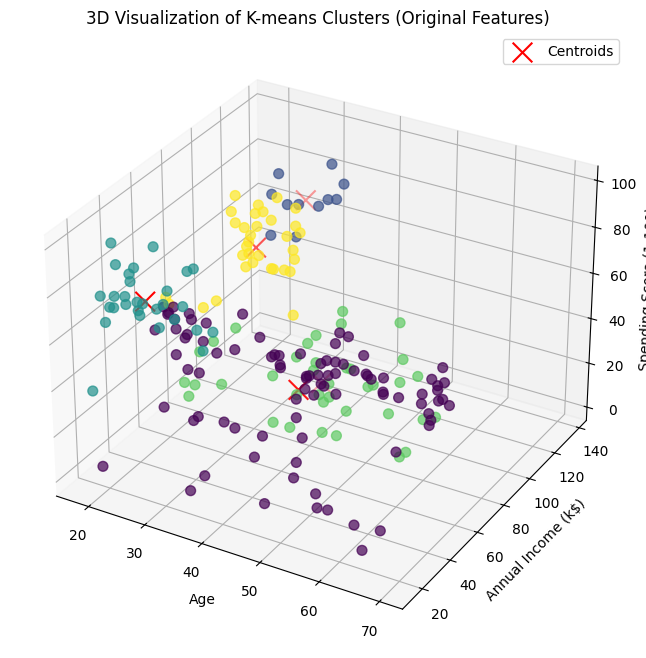

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Suponiendo que tienes el DataFrame df cargado
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')  # Descomenta y reemplaza con el archivo real

# Seleccionar las características
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

df = df[features]

# Aplicar K-means con 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Crear el gráfico en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos de los clusters
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, cmap='viridis', s=50, alpha=0.7)

# Centroides de los clusters en el espacio original
centroids = kmeans.cluster_centers_

# Mostrar los centroides
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', color='red', s=200, label='Centroids')

# Etiquetas y título
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('3D Visualization of K-means Clusters (Original Features)')

# Mostrar la leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


1. **Cluster 1 (puntos turquesa)**:
   - **Características**: Clientes más jóvenes (aproximadamente entre 10 y 20 años), con ingresos anuales bajos, pero con altos niveles de gasto.
   - **Interpretación**: Estos clientes podrían estar en una etapa temprana de su vida profesional, pero tienen un comportamiento de compra que supera sus ingresos, lo que podría indicar que tienen un alto poder adquisitivo relativo, quizás debido a factores como el apoyo familiar.

2. **Cluster 2 (puntos amarillos)**:
   - **Características**: Clientes jóvenes (15-20 años) con ingresos anuales altos y puntajes de gasto altos.
   - **Interpretación**: Este grupo podría estar compuesto por jóvenes que ya tienen una fuente de ingresos significativa y, por lo tanto, tienen la capacidad de gastar en productos o servicios de alta gama. Es un grupo que combina juventud con un poder adquisitivo elevado.

3. **Cluster 3 (puntos morados)**:
   - **Características**: Clientes de mayor edad (entre 30 y 60 años), con ingresos anuales más altos, pero con puntajes de gasto bajos.
   - **Interpretación**: Este grupo refleja clientes que tienen una situación financiera estable debido a sus ingresos más altos, pero su comportamiento de gasto es más conservador. Pueden ser personas más responsables o enfocadas en el ahorro.

4. **Cluster 4 (puntos verdes)**:
   - **Características**: Clientes de edades variadas (entre 20 y 60 años), con ingresos medios a altos, pero puntajes de gasto bajos.
   - **Interpretación**: Este grupo parece estar formado por clientes con ingresos estables, pero que no gastan tanto. Esto podría deberse a un enfoque más moderado del consumo, o bien a una falta de interés por los productos que podrían ofrecerse.

5. **Cluster 5 (puntos azules)**:
   - **Características**: Clientes jóvenes (entre 15 y 25 años) con ingresos anuales altos y puntajes de gasto altos.
   - **Interpretación**: Al igual que el **Cluster 2**, este grupo está compuesto por jóvenes con alto poder adquisitivo, pero la diferencia puede ser que este cluster está más concentrado en el rango de edad 15-25 años. Este grupo podría incluir personas en sus primeros años de carrera profesional, pero con ingresos relativamente altos.

### Resumen:
- **Cluster 1**: Jóvenes con bajo ingreso, pero alto gasto.
- **Cluster 2**: Jóvenes con alto ingreso y alto gasto.
- **Cluster 3**: Adultos mayores con alto ingreso y bajo gasto.
- **Cluster 4**: Adultos con ingreso medio a alto y bajo gasto.
- **Cluster 5**: Jóvenes con alto ingreso y alto gasto.

Cada cluster refleja un comportamiento de compra distinto basado en la edad, el ingreso y el gasto, lo cual es útil para estrategias de marketing o segmentación de clientes.